# Sommaire :

- 1) <a href="#C1">Importation et découverte du jeu de données</a>  
  
  
- 2) <a href="#C2">Extraction des features texte</a>
    - <a href="#C3">Approche de type "bag-of-words" : comptage simple de mots et Tf-idf.
    - <a href="#C4">Approche de type word embedding : Word2Vec
    - <a href="#C5">Approche de type word embedding : Doc2Vec
    - <a href="#C6">Utilisation d'un modèle pré-entrainé pour l'approche Word2Vec.
    - <a href="#C7">Approche de type word embedding : BERT
    - <a href="#C8">Approche de type sentence embedding : USE (Universal Sentence Encoder)
    
    
- 3) <a href="#C9">Extraction des features images
    - <a href="#C10">Approche SIFT
    - <a href="#C11">Approche de type CNN Transfer Learning
        - <a href="#C12">VGG16
        - <a href="#C13">EfficientNet
        - <a href="#C14">ResNet50
    
    
- 4) <a href="#C15">Association des features texte et images
    
    
- 5) <a href="#C16">Bonus : résultats en utilisant un classifier sur les images
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <a name="C1">1) Importation et découverte du jeu de données

In [2]:
df_articles = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv", sep=",")

In [3]:
df_articles.shape

(1050, 15)

In [4]:
df_articles

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [5]:
df_articles.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [6]:
df_articles['product_category_tree'].unique()

array(['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]',
       '["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]',
       '["Watches >> Wrist Watches >> Camerii Wrist Watches"]',
       '["Watches >> Wrist Watches >> T STAR Wrist Watches"]',
       '["Watches >> Wrist Watches >> Alfajr Wrist Watches"]',
       '["Watches >> Wrist Watches >> T

In [7]:
df_articles.iloc[0,:].values

array(['55b85ea15a1536d46b7190ad6fff8ce7', '2016-04-30 03:22:56 +0000',
       'http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z',
       'Elegance Polyester Multicolor Abstract Eyelet Door Curtain',
       '["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
       'CRNEG7BKMFFYHQ8Z', 1899.0, 899.0,
       '55b85ea15a1536d46b7190ad6fff8ce7.jpg', False,
       'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bri

In [8]:
df_articles.iloc[1,:].values

array(['7b72c92c2f6c40268628ec5f14c6d590', '2016-04-30 03:22:56 +0000',
       'http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH',
       'Sathiyas Cotton Bath Towel',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
       'BTWEGFZHGBXPHZUH', 600.0, 449.0,
       '7b72c92c2f6c40268628ec5f14c6d590.jpg', False,
       'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel',
       'No rating available', 'No rating available', 'Sathiyas',
       '{"product_specifica

In [9]:
df_articles['description'].unique()

array(['Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so t

# <a name="C2">2) Extraction des features texte

## <a name="C3">Approche de type "bag-of-words" : comptage simple de mots et Tf-idf.

In [10]:
import nltk
import string
from nltk.stem import WordNetLemmatizer

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
from nltk.corpus import stopwords

In [13]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
nltk.corpus.words.words()

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'aba',
 'Ababdeh',
 'Ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'Abadite',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'Abama',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'Abanic',
 'Abantes',
 'abaptiston',
 'Abarambo',
 'Abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'Abasgi',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'Abassin',
 'abastardize',
 'abatable',
 'abate

In [15]:
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

In [16]:
# On crée une fonction qui fait le pré-traitement du texte.

def preprocess_text(text):
    
    lower_text_without_punct=''
    
    # On remplace la ponctuation par un espace, ce qui permet d'éviter le cas où il n'y a pas d'espace après un point et que
    # les 2 mots se retrouvent collés ensembles lorsque l'on supprime la ponctuation.
    for i in text:
        if i in string.punctuation:
            lower_text_without_punct = lower_text_without_punct + ' '
        else: lower_text_without_punct = lower_text_without_punct + i.lower()

    # On enlève les chiffres.
    text_without_num = "".join(i for i in lower_text_without_punct if not i.isdigit())
    
    # On "tokenize" le texte.
    tokenize_text = nltk.tokenize.word_tokenize(text_without_num)           
    
    # On supprime les stopwords.
    text_without_stopwords = [i for i in tokenize_text if i not in stopwords]               
    
    # On "lemmatize".
    text_lemmatize = [lemmatizer.lemmatize(w) for w in text_without_stopwords]              
    
    # On garde uniquement les mots supérieurs à 2 caractères et qui sont inclus dans le vocabulaire 'words'.
    text_clean = ' '.join(w for w in text_lemmatize if w.lower() in words and len(w) > 2)             

    return text_clean 

In [17]:
# On crée une fonction qui récupère la catégorie principale et les sous-catégories d'un article.

def cat_extract(cat_desc):
    
    cat_clean = cat_desc.replace("[", '').replace("]", '').replace('"', '')
    
    cat_clean = cat_clean.split(' >> ')
    
    return cat_clean

In [18]:
# On crée une colonne qui nous donne la liste des catégories et sous catégories d'un article.

df_articles['category_list'] = df_articles['product_category_tree'].apply(lambda x : cat_extract(x))

In [19]:
df_articles

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [20]:
# On analyse la répartition des catégories principales des articles.

df_articles['category_list'].apply(lambda x : x[0]).value_counts()

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: category_list, dtype: int64

In [21]:
# On crée une colonne qui indique la catégorie principale d'un article.

df_articles['cat'] = df_articles['category_list'].apply(lambda x : x[0])

In [22]:
# On crée une colonne qui indique la 1ère sous-catégorie d'un article.

df_articles['sub_cat'] = df_articles['category_list'].apply(lambda x : x[1])

In [23]:
pd.set_option('display.max_rows', None)

In [24]:
# On analyse la répartition des articles dans leur 1ère sous-catégorie à l'aide d'un pivot table.

pd.pivot_table(df_articles, index=["cat", "sub_cat"], values=['uniq_id'], aggfunc={'uniq_id': len})

uniq_id
cat                        sub_cat                                 
Baby Care                  Baby & Kids Gifts                     15
                           Baby Bath & Skin                      14
                           Baby Bedding                          15
                           Baby Grooming                          4
                           Diapering & Potty Training             7
                           Feeding & Nursing                      8
                           Furniture & Furnishings                2
                           Infant Wear                           84
                           Strollers & Activity Gear              1
Beauty and Personal Care   Bath and Spa                           7
                           Beauty Accessories                     1
                           Body and Skin Care                    15
                           Combos and Kits                       24
                           Eye Care                               2
                           Fragrances                            65
                           Hair Care                              9
                           Health Care                            7
                           Makeup                                18
                           Men's Grooming                         1
                           Women's Hygiene                        1
Computers                  Computer Components                    2
                           Computer Peripherals                   4
                           Laptop Accessories                    87
                           Laptops                                2
                           Network Components                    49
                           Software                               1
                           Storage                                2
                           Tablet Accessories                     3
Home Decor & Festive Needs Candles & Fragrances                   1
                           Decorative Lighting & Lamps           14
                           Flowers, Plants & Vases                5
                           Garden & Leisure                       1
                           Religion & Devotion                    3
                           Showpiece                              5
                           Showpieces                            71
                           TRUE Home Decor & Festive Needs        1
                           Table Decor & Handicrafts             27
                           Wall Decor & Clocks                   22
Home Furnishing            Bath Linen                            21
                           Bed Linen                             65
                           Curtains & Accessories                19
                           Cushions, Pillows & Covers            13
                           Floor Coverings                        6
                           JMD Home Furnishing                    1
                           Kitchen & Dining Linen                14
                           Kripa's Home Furnishing                1
                           Living                                 6
                           Living Room Furnishing                 3
                           Tidy Home Furnishing                   1
Kitchen & Dining           Bar & Glassware                        8
                           Coffee Mugs                           74
                           Consumables & Disposables              1
                           Containers & Bottles                  13
                           Cookware                              27
                           Dinnerware & Crockery                  1
                           Housekeeping & Laundry                 1
                           Kitchen Tools                         14
                           Lighting             

--> On remarque que les 1ères sous-catégories sont très mal équilibrées avec certaines sous-catégories ne contenant qu'un seul article. Donc pour la suite nous allons utiliser la catégorie princiaple de l'article, elles sont donc au nombre de 7 et sont parfaitement équilibrés (150 articles par catégorie).

In [25]:
pd.reset_option('display.max_rows')

In [26]:
l_cat = list(set(df_articles['cat']))

In [27]:
l_cat

['Kitchen & Dining',
 'Home Furnishing',
 'Watches',
 'Home Decor & Festive Needs',
 'Baby Care',
 'Computers',
 'Beauty and Personal Care']

In [28]:
# On crée la liste des numéros de catégorie réels de chaque article afin de pouvoir l'utiliser lors de la comparaison 
# pour le clustering.

y_cat_num = [l_cat.index(df_articles.iloc[i]['cat']) for i in range(len(df_articles))]

In [29]:
y_cat_num

[1,
 4,
 4,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 0,
 0,
 1,
 4,
 1,
 4,
 6,
 0,
 0,
 0,
 5,
 0,
 6,
 0,
 5,
 0,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 0,
 0,
 4,
 1,
 0,
 0,
 0,
 1,
 0,
 4,
 4,
 4,
 6,
 6,
 1,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 0,
 5,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 3,
 3,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 4,
 3,
 4,
 0,
 4,
 5,
 3,
 4,
 3,
 5,
 1,
 4,
 5,
 3,
 6,
 6,
 6,
 6,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 3,
 4,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 3,
 4,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,


In [30]:
import time
from sklearn import cluster, metrics
from sklearn import manifold

In [31]:
# On crée une fonction qui permet de faire un Tsne de 2 composantes, puis de faire un k-means de 7 clusters et
# enfin de calculer le ARI entre les vrais catégories et le résultat du k-means.
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# On crée une fonction qui permet de visualiser le Tsne selon les vraies catégories et selon les clusters déterminés par le
# k-means.
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(17,8))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des articles par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des articles par clusters')
    
    plt.show()
    print("ARI : ", ARI)

In [32]:
# On crée une colonne dans laquelle on pré-traite la description de chaque article.

df_articles['preprocess_description'] = df_articles['description'].apply(lambda x : preprocess_text(x))

In [34]:
df_articles

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [75]:
# On crée les bag of words avec l'approche comptage simple de mots (CountVectorizer) et avec l'approche Tf-idf (TfidfVectorizer).

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'preprocess_description'
cv_fit = cvect.fit(df_articles[feat])
ctf_fit = ctf.fit(df_articles[feat])

cv_transform = cvect.transform(df_articles[feat])  
ctf_transform = ctf.transform(df_articles[feat])  

In [36]:
# On analyse les résultats du clustering obtenus avec le comptage simple et Tf-idf.

print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

CountVectorizer : 
-----------------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4226 time :  26.0

Tf-idf : 
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4275 time :  26.0


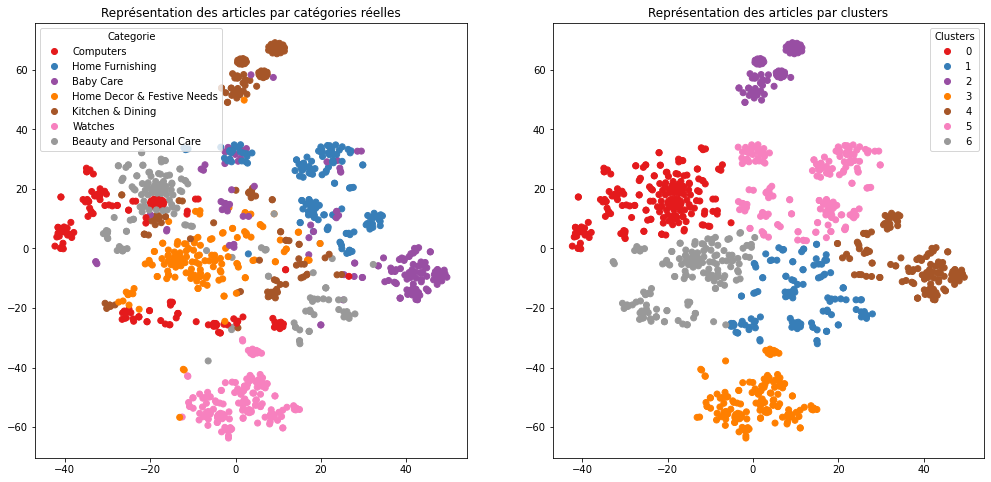

ARI :  0.4275


In [37]:
# On visualise sur un graphique en 2 dimensions les résultats pour le Tf-idf.

TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [38]:
# Faisons maintenant varier les hyperparamètres 'max_df' et 'min_df' afin d'analyser l'impact sur les résultats.

max_df = [0.1, 0.25, 0.5, 0.75, 0.9]
min_df = [1, 2, 5, 10]

df_results = pd.DataFrame(
    columns=["max_df", "min_df", "ARI_cv", "ARI_ctf"]
)

for i in max_df:
    for j in min_df:
        cvect = CountVectorizer(stop_words='english', max_df=i, min_df=j)
        ctf = TfidfVectorizer(stop_words='english', max_df=i, min_df=j)
        
        feat = 'preprocess_description'
        cv_fit = cvect.fit(df_articles[feat])
        ctf_fit = ctf.fit(df_articles[feat])

        cv_transform = cvect.transform(df_articles[feat])  
        ctf_transform = ctf.transform(df_articles[feat])
        
        print("CountVectorizer : "+ "max_df = "+ str(i) + " ; min_df = "+ str(j))
        print("-----------------")
        ARI_cv, X_tsne, labels = ARI_fct(cv_transform)
        print()
        print("Tf-idf : "+ "max_df = "+ str(i) + " ; min_df = "+ str(j))
        print("--------")
        ARI_ctf, X_tsne, labels = ARI_fct(ctf_transform)
        
        df_results = df_results.append(
            {
                "max_df": i,
                "min_df": j,
                "ARI_cv": ARI_cv,
                "ARI_ctf": ARI_ctf,
            },
            ignore_index=True,
        ) 

CountVectorizer : max_df = 0.1 ; min_df = 1
-----------------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3323 time :  27.0

Tf-idf : max_df = 0.1 ; min_df = 1
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.2319 time :  25.0
CountVectorizer : max_df = 0.1 ; min_df = 2
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3473 time :  27.0

Tf-idf : max_df = 0.1 ; min_df = 2
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.203 time :  26.0
CountVectorizer : max_df = 0.1 ; min_df = 5
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4305 time :  27.0

Tf-idf : max_df = 0.1 ; min_df = 5
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.2142 time :  27.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


CountVectorizer : max_df = 0.1 ; min_df = 10
-----------------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3992 time :  27.0

Tf-idf : max_df = 0.1 ; min_df = 10
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.1874 time :  28.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


CountVectorizer : max_df = 0.25 ; min_df = 1
-----------------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4592 time :  27.0

Tf-idf : max_df = 0.25 ; min_df = 1
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.314 time :  26.0
CountVectorizer : max_df = 0.25 ; min_df = 2
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.434 time :  27.0

Tf-idf : max_df = 0.25 ; min_df = 2
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.308 time :  26.0
CountVectorizer : max_df = 0.25 ; min_df = 5
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4962 time :  27.0

Tf-idf : max_df = 0.25 ; min_df = 5
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3322 time :  25.0
CountVectorizer : max_df = 0.25 ; min_df = 10
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3816 time :  26.0

Tf-idf : max_df = 0.25 ; min_df = 10
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3209 time :  26.0
CountVectorizer : max_df = 0.5 ; min_df = 1
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4395 time :  27.0

Tf-idf : max_df = 0.5 ; min_df = 1
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.5177 time :  25.0
CountVectorizer : max_df = 0.5 ; min_df = 2
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.42 time :  26.0

Tf-idf : max_df = 0.5 ; min_df = 2
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.5327 time :  25.0
CountVectorizer : max_df = 0.5 ; min_df = 5
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4546 time :  27.0

Tf-idf : max_df = 0.5 ; min_df = 5
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.5136 time :  24.0
CountVectorizer : max_df = 0.5 ; min_df = 10
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.437 time :  27.0

Tf-idf : max_df = 0.5 ; min_df = 10
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.5281 time :  26.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


CountVectorizer : max_df = 0.75 ; min_df = 1
-----------------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4226 time :  26.0

Tf-idf : max_df = 0.75 ; min_df = 1
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4275 time :  26.0
CountVectorizer : max_df = 0.75 ; min_df = 2
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4006 time :  27.0

Tf-idf : max_df = 0.75 ; min_df = 2
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4708 time :  26.0
CountVectorizer : max_df = 0.75 ; min_df = 5
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4458 time :  27.0

Tf-idf : max_df = 0.75 ; min_df = 5
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4543 time :  25.0
CountVectorizer : max_df = 0.75 ; min_df = 10
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4576 time :  26.0

Tf-idf : max_df = 0.75 ; min_df = 10
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4048 time :  25.0
CountVectorizer : max_df = 0.9 ; min_df = 1
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4226 time :  26.0

Tf-idf : max_df = 0.9 ; min_df = 1
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4275 time :  26.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


CountVectorizer : max_df = 0.9 ; min_df = 2
-----------------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4006 time :  27.0

Tf-idf : max_df = 0.9 ; min_df = 2
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4708 time :  25.0
CountVectorizer : max_df = 0.9 ; min_df = 5
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4458 time :  27.0

Tf-idf : max_df = 0.9 ; min_df = 5
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4543 time :  25.0
CountVectorizer : max_df = 0.9 ; min_df = 10
-----------------


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4576 time :  26.0

Tf-idf : max_df = 0.9 ; min_df = 10
--------


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4048 time :  26.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1816181035.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


In [39]:
df_results

max_df  min_df  ARI_cv  ARI_ctf
0     0.10     1.0  0.3323   0.2319
1     0.10     2.0  0.3473   0.2030
2     0.10     5.0  0.4305   0.2142
3     0.10    10.0  0.3992   0.1874
4     0.25     1.0  0.4592   0.3140
5     0.25     2.0  0.4340   0.3080
6     0.25     5.0  0.4962   0.3322
7     0.25    10.0  0.3816   0.3209
8     0.50     1.0  0.4395   0.5177
9     0.50     2.0  0.4200   0.5327
10    0.50     5.0  0.4546   0.5136
11    0.50    10.0  0.4370   0.5281
12    0.75     1.0  0.4226   0.4275
13    0.75     2.0  0.4006   0.4708
14    0.75     5.0  0.4458   0.4543
15    0.75    10.0  0.4576   0.4048
16    0.90     1.0  0.4226   0.4275
17    0.90     2.0  0.4006   0.4708
18    0.90     5.0  0.4458   0.4543
19    0.90    10.0  0.4576   0.4048

In [40]:
# On analyse le ARI maximum avec l'approche CountVectorizer.

df_results[df_results['ARI_cv'] == df_results['ARI_cv'].max()]

max_df  min_df  ARI_cv  ARI_ctf
6    0.25     5.0  0.4962   0.3322

In [41]:
# On analyse le ARI maximum avec l'approche Tf-idf.

df_results[df_results['ARI_ctf'] == df_results['ARI_ctf'].max()]

max_df  min_df  ARI_cv  ARI_ctf
9     0.5     2.0    0.42   0.5327

On obtiens le meilleur ARI (0.53) avec l'approche Tf-idf et avec max_df = 0.5 et min_df = 2.

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.5327 time :  37.0


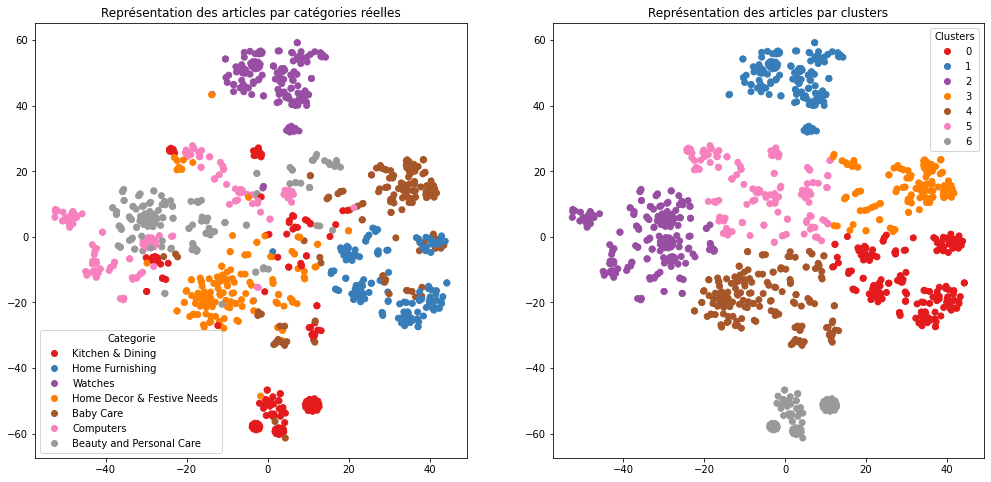

ARI :  0.5327


In [76]:
# Visualisons graphiquement le résultat de cette configuration.

ctf = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)

feat = 'preprocess_description'
ctf_fit = ctf.fit(df_articles[feat])
  
ctf_transform = ctf.transform(df_articles[feat])

ARI_ctf, X_tsne, labels = ARI_fct(ctf_transform)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI_ctf)

In [77]:
# On copie le 'X_tsne' et les features 'ctf_transform' du tf-idf.

X_tsne_tf_idf = X_tsne.copy()
features_tf_idf = ctf_transform.copy()

In [78]:
# On fait correspondre les vrais catégories au numéro de clusters du k-means afin de réaliser une matrice de confusion.

df_articles['cat_num'] = df_articles['cat'].replace({'Watches': 1, 'Kitchen & Dining': 6, 'Baby Care': 3, 'Computers': 5, 
                                                     'Home Decor & Festive Needs': 4, 'Home Furnishing': 0, 
                                                     'Beauty and Personal Care': 2})

In [79]:
# On crée une colonne reprenant le résultat du k-means pour chaque article.

df_articles['tf_idf_labels'] = labels

In [80]:
df_articles

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
conf_matrix = confusion_matrix(df_articles['cat_num'], df_articles['tf_idf_labels'])

In [49]:
cm_cat = ['Home Furnishing', 'Watches', 'Beauty and Personal Care', 'Baby Care', 'Home Decor & Festive Needs', 
         'Computers', 'Kitchen & Dining']

In [50]:
df_cm = pd.DataFrame(conf_matrix, index=cm_cat, columns=cm_cat)

In [51]:
df_cm

Home Furnishing  Watches  \
Home Furnishing                         144        0   
Watches                                   0      148   
Beauty and Personal Care                  0        0   
Baby Care                                25        0   
Home Decor & Festive Needs                3        1   
Computers                                 0        0   
Kitchen & Dining                          1        0   

                            Beauty and Personal Care  Baby Care  \
Home Furnishing                                    0          5   
Watches                                            0          0   
Beauty and Personal Care                          91         15   
Baby Care                                          3        100   
Home Decor & Festive Needs                         1          1   
Computers                                         88          1   
Kitchen & Dining                                  17          3   

                            Home Decor & Festive Needs  Computers  \
Home Furnishing                                      1          0   
Watches                                              0          2   
Beauty and Personal Care                             8         36   
Baby Care                                           16          4   
Home Decor & Festive Needs                         125         18   
Computers                                            2         59   
Kitchen & Dining                                    23         32   

                            Kitchen & Dining  
Home Furnishing                            0  
Watches                                    0  
Beauty and Personal Care                   0  
Baby Care                                  2  
Home Decor & Festive Needs                 1  
Computers                                  0  
Kitchen & Dining                          74

In [52]:
from pretty_confusion_matrix import pp_matrix

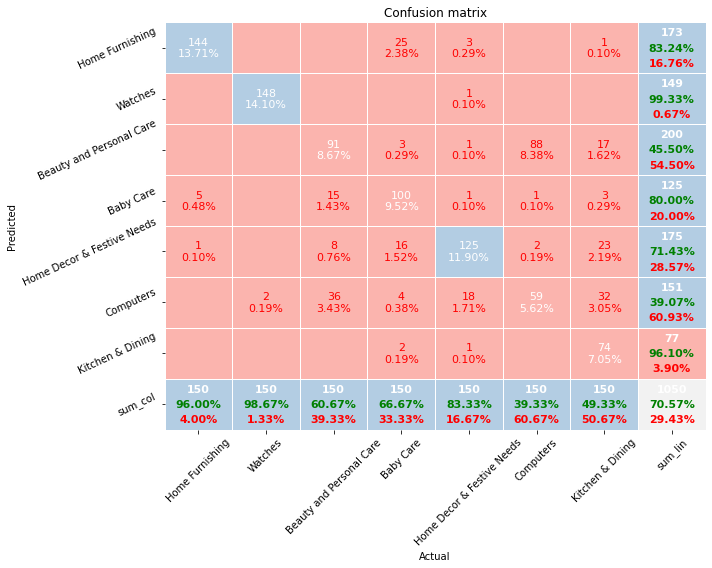

In [53]:
pp_matrix(df_cm, figsize=(10, 8), cmap='Pastel1')

--> On peut voir grâce à cette matrice de confusion qu'il y a très peu d'erreurs sur les catégories 'Home Furnishing' et 'Watches'. Les résultats sur la catégorie 'Home Decor & Festive Needs' sont plutôt bons également. Les résultats sur les catégories 'Beauty and Personal Care' et 'Baby Care' sont un peu moins bons, et il y a ensuite une forte dégradation des résultats sur les catégories 'Kitchen & Dining' et 'Computers'.

In [ ]:
# Analysons la description des articles sur certaines des erreurs commises entre les catégories 'Computers' 
# et 'Beauty and Personal Care' par exemple.

In [82]:
# Articles qui ont été clusturisés en tant que 'Beauty and Personal Care' alors que ce sont des 'Computers'.
# 'cat_num' : 5 = Computers ;   'tf_idf_labels' : 2 = Beauty and Personal Care

df_error_comp_vs_beauty = df_articles[(df_articles['cat_num']==5) & (df_articles['tf_idf_labels']==2)]

In [83]:
df_error_comp_vs_beauty

uniq_id            crawl_timestamp  \
310  64b463dc0b75ae40a848498c657041e6  2015-12-01 06:13:00 +0000   
312  c20bf28cd809790c04e78fdaf47c038f  2015-12-01 06:13:00 +0000   
318  fd2716d0e5dd7ffc367ca4dd9f97aaa0  2015-12-01 06:13:00 +0000   
321  5df72b5295dc5e6126693e640b50f3a2  2015-12-01 06:13:00 +0000   
323  f309bdd259c5b46a560bc1620e641947  2015-12-01 06:13:00 +0000   
..                                ...                        ...   
854  136f213080426c35520f1b1540c4a390  2015-12-29 05:07:38 +0000   
856  568f331e1039bf2e0635b899c2b3248f  2015-12-29 05:07:38 +0000   
860  6136976dc5a433cdf8e2559b8510bdce  2015-12-29 05:07:38 +0000   
861  ad08a6efe82576ab162a9336feff647f  2015-12-29 05:07:38 +0000   
864  19d2dbc1789653c58bce08c169662cf2  2015-12-29 05:07:38 +0000   

                                           product_url  \
310  http://www.flipkart.com/linksys-smart-wi-fi-ro...   
312  http://www.flipkart.com/intex-w150d/p/itme7ft9...   
318  http://www.flipkart.com/asus-wireless-ac2400-d...   
321  http://www.flipkart.com/apple-md199hn-a/p/itme...   
323  http://www.flipkart.com/tenda-te-f452/p/itmdzk...   
..                                                 ...   
854  http://www.flipkart.com/kliqvik-six-port-usb-h...   
856  http://www.flipkart.com/lifestyle-you-ig43-04-...   
860  http://www.flipkart.com/dizionario-mini-perfum...   
861  http://www.flipkart.com/kensington-33399eu-usb...   
864  http://www.flipkart.com/rce-hp-probook-4430s-6...   

                                          product_name  \
310                         Linksys Smart Wi-Fi Router   
312                                        Intex W150D   
318      Asus Wireless AC2400 Dual-band Gigabit Router   
321                                    Apple MD199HN/A   
323                                      Tenda TE-F452   
..                                                 ...   
854  KLIQVIK SIX PORT USB HUB FOR ANDROID MOBILES T...   
856                  Lifestyle-You IG43_04 USB USB Fan   
860  Dizionario Mini Perfume Fan Cooling Fancoolerb...   
861                     Kensington 33399EU USB USB Hub   
864         RCE HP ProBook 4430s 6 Cell Laptop Battery   

                                 product_category_tree               pid  \
310  ["Computers >> Network Components >> Routers >...  RTRDZTF9DBT4CW8U   
312  ["Computers >> Network Components >> Routers >...  RTRE7FT9VKRGNTRR   
318  ["Computers >> Network Components >> Routers >...  RTREYTY2TMVNXZG4   
321  ["Computers >> Network Components >> Routers >...  RTREBZRG4SE4AFBX   
323  ["Computers >> Network Components >> Routers >...  RTRDZK8XD2H2VBAD   
..                                                 ...               ...   
854  ["Computers >> Laptop Accessories >> USB Gadge...  USGEDZF2E7VTGRCC   
856  ["Computers >> Laptop Accessories >> USB Gadge...  USGE5BVUJY4DCCZF   
860  ["Computers >> Laptop Accessories >> USB Gadge...  USGEBYYPVTTJA9JR   
861  ["Computers >> Laptop Accessories >> USB Gadge...  USGDU93BCDCFUQEC   
864  ["Computers >> Laptop Accessories >> Batteries...  ACCDXFFC3VSUFGYC   

     retail_price  discounted_price                                 image  \
310       14999.0           13500.0  64b463dc0b75ae40a848498c657041e6.jpg   
312        2200.0            1350.0  c20bf28cd809790c04e78fdaf47c038f.jpg   
318       29990.0           21290.0  fd2716d0e5dd7ffc367ca4dd9f97aaa0.jpg   
321        5900.0            5900.0  5df72b5295dc5e6126693e640b50f3a2.jpg   
323        9500.0            4527.0  f309bdd259c5b46a560bc1620e641947.jpg   
..            ...               ...                                   ...   
854        1499.0            1099.0  136f213080426c35520f1b1540c4a390.jpg   
856         999.0             499.0  568f331e1039bf2e0635b899c2b3248f.jpg   
860        1199.0             799.0  6136976dc5a433cdf8e2559b8510bdce.jpg   
861         699.0             549.0  ad08a6efe82576ab162a9336feff647f.jpg   
864        2800.0            1790.0  19d2dbc1789653c58bce08

In [88]:
# Analysons quelques descriptions.

df_error_comp_vs_beauty[:20]['preprocess_description'].values

array(['buy smart router genuine product day replacement guarantee free shipping cash delivery',
       'buy genuine product day replacement guarantee free shipping cash delivery',
       'buy wireless dual band router genuine product day replacement guarantee free shipping cash delivery',
       'buy apple genuine product day replacement guarantee free shipping cash delivery',
       'buy genuine product day replacement guarantee free shipping cash delivery',
       'buy wireless range extender genuine product day replacement guarantee free shipping cash delivery',
       'buy tew genuine product day replacement guarantee free shipping cash delivery',
       'buy genuine product day replacement guarantee free shipping cash delivery',
       'buy dual band wireless router genuine product day replacement guarantee free shipping cash delivery',
       'buy wireless router genuine product day replacement guarantee free shipping cash delivery',
       'buy wireless router genuine product d

In [133]:
# Analysons maintenant la description de quelques articles 'Computers' qui ont bien été clusterisés en 'Computers'.

df_articles[(df_articles['cat_num']==5) & (df_articles['tf_idf_labels']==5)][:5]['preprocess_description'].values

array(['key feature link dap android specification link dap white speed wireless speed speed general brand link box extender plug model dap type range repeater color white warranty covered warranty damage warranty summary year service type damage covered warranty repair dimension weight connectivity number antenna number port antenna internal protocol standard operating condition operating humidity operating non storage non temperature operating storage degree additional feature certification',
       'key feature slim key flexible wired flexible keyboard size slim key flexible wired flexible keyboard white price working environment fit easily keyboard water alcohol disinfectant help prevent spread disease germ suitable public place use school restaurant hospital clean keyboard requirement sealed keyboard easily also good use dusty area factory outdoor quiet good match library use used keyboard may push key tiny bit harder get output dustproof washable plug weight operation temperature

In [134]:
# Analysons maintenant la description de quelques articles 'Beauty and Personal Care' qui ont bien été clusterisés 
# en 'Beauty and Personal Care'.

df_articles[(df_articles['cat_num']==2) & (df_articles['tf_idf_labels']==2)][:10]['preprocess_description'].values

array(['buy industry bangle four roll ring earing box vanity pouch industry bangle four roll ring earing box vanity pouch best price free shipping cash delivery genuine product day replacement guarantee',
       'buy vanity pouch vanity pouch best price free shipping cash delivery genuine product day replacement guarantee',
       'buy sally cross festival kit price genuine product day replacement guarantee free shipping cash delivery',
       'buy equinox body fat analyzer genuine product day replacement guarantee free shipping cash delivery',
       'buy wild stone red juice set genuine product day replacement guarantee free shipping cash delivery',
       'buy ice drive dynamic pulse set genuine product day replacement guarantee free shipping cash delivery',
       'vincent valentine set dark fire dark fire majesty deodorant set set price dark fire sparkle enchanting top note blend black currant star anise distinctive spiciness galanga root depth green pepper extract warmth base ric

--> On peut voir que l'on retrouve certains mots qui sont également dans la description des articles 'Computers' mais qui ont été clusterisés en 'Beauty and Personal Care' comme : 'buy', 'genuine', 'product', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'delivery'.

## <a name="C4">Approche de type word embedding : Word2Vec

In [54]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [55]:
import gensim

### Création du modèle Word2Vec

In [56]:
# On détermine la longueur maximum d'une description sur l'ensemble des descriptions préprocessées.

maxlen_preprocess_desc = df_articles['preprocess_description'].apply(lambda x: len(nltk.tokenize.word_tokenize(x))).max()

In [57]:
maxlen_preprocess_desc

327

In [58]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = maxlen_preprocess_desc
sentences = df_articles['preprocess_description'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [59]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 3088
Word2Vec trained


In [60]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 3089


In [61]:
x_sentences

array([[ 36,  13, 627, ...,   0,   0,   0],
       [ 14,  22, 149, ...,   0,   0,   0],
       [ 36,  13,  22, ...,   0,   0,   0],
       ...,
       [  3, 609, 343, ...,   0,   0,   0],
       [  3, 307, 244, ...,   0,   0,   0],
       [  3, 343, 244, ...,   0,   0,   0]])

### Création de la matrice d'embedding

In [62]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (3089, 300)


### Création du modèle d'embedding

In [63]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 327)]             0         
                                                                 
 embedding (Embedding)       (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________


### Exécution du modèle

In [64]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 7ms/step


(1050, 300)

In [65]:
ARI, X_tsne, labels = ARI_fct(embeddings)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3319 time :  32.0


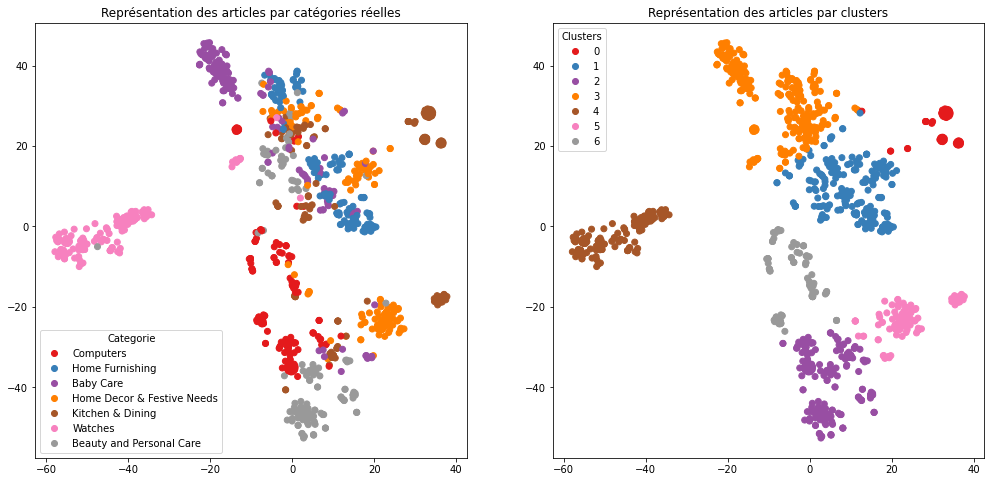

ARI :  0.3319


In [66]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

--> On peut remarquer que la catégorie 'Watches' est très bien clusterisé mais que les autres catégories sont moins bien isolées. Le ARI est moins bon que pour l'approche en Tf-idf (0.33 vs 0.53).

In [67]:
# Modifions quelques hyperparamètres pour analyser l'impact sur le ARI.

from sklearn.model_selection import ParameterGrid

param_grid = {'w2v_size': [100, 300], 
              'w2v_window': [5, 10],
              'w2v_min_count': [1, 5, 10],
              'w2v_epochs': [100, 200],
              }

# On stocke les résultats dans un dataframe.
df_results = pd.DataFrame(
    columns=["params", "ARI"]
)


for p in ParameterGrid(param_grid):
    w2v_model = gensim.models.Word2Vec(min_count=p['w2v_min_count'], window=p['w2v_window'],
                                                vector_size=p['w2v_size'],
                                                seed=42,
                                                workers=1)
    w2v_model.build_vocab(sentences)
    w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=p['w2v_epochs'])

    model_vectors = w2v_model.wv
    w2v_words = model_vectors.index_to_key
    
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                         maxlen=maxlen,
                                                         padding='post') 

    num_words = len(tokenizer.word_index) + 1
    
    word_index = tokenizer.word_index
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, p['w2v_size']))
    i=0
    j=0

    for word, idx in word_index.items():
        i +=1
        if word in w2v_words:
            j +=1
            embedding_vector = model_vectors[word]
            if embedding_vector is not None:
                embedding_matrix[idx] = model_vectors[word]

    word_rate = np.round(j/i,4)
    print("Word embedding rate : ", word_rate)
    print("Embedding matrix: %s" % str(embedding_matrix.shape))
    
    input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
    word_input=Input(shape=(maxlen,),dtype='float64')  
    word_embedding=Embedding(input_dim=vocab_size,
                             output_dim=p['w2v_size'],
                             weights = [embedding_matrix],
                             input_length=maxlen)(word_input)
    word_vec=GlobalAveragePooling1D()(word_embedding)  
    embed_model = Model([word_input],word_vec)

    embed_model.summary()
    
    embeddings = embed_model.predict(x_sentences)
    embeddings.shape
    
    ARI, X_tsne, labels = ARI_fct(embeddings)
    
    df_results = df_results.append(
            {
                "params": p,
                "ARI": ARI,
            },
            ignore_index=True,
        )

Word embedding rate :  1.0
Embedding matrix: (3089, 100)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 327)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 327, 100)          308900    
                                                                 
 global_average_pooling1d_1   (None, 100)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 308,900
Trainable params: 308,900
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 4ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3445 time :  33.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  1.0
Embedding matrix: (3089, 100)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 327)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 327, 100)          308900    
                                                                 
 global_average_pooling1d_2   (None, 100)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 308,900
Trainable params: 308,900
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 4ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3402 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  1.0
Embedding matrix: (3089, 300)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 327)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_3   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 7ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3319 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  1.0
Embedding matrix: (3089, 300)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_4   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 7ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3367 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.3824
Embedding matrix: (3089, 100)
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 327, 100)          308900    
                                                                 
 global_average_pooling1d_5   (None, 100)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 308,900
Trainable params: 308,900
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 3ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.325 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.3824
Embedding matrix: (3089, 100)
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 327, 100)          308900    
                                                                 
 global_average_pooling1d_6   (None, 100)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 308,900
Trainable params: 308,900
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 3ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3446 time :  33.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.3824
Embedding matrix: (3089, 300)
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_7 (Embedding)     (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_7   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 7ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3238 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.3824
Embedding matrix: (3089, 300)
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_8 (Embedding)     (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_8   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 7ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3458 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.2315
Embedding matrix: (3089, 100)
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_9 (Embedding)     (None, 327, 100)          308900    
                                                                 
 global_average_pooling1d_9   (None, 100)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 308,900
Trainable params: 308,900
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 3ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3439 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.2315
Embedding matrix: (3089, 100)
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_10 (Embedding)    (None, 327, 100)          308900    
                                                                 
 global_average_pooling1d_10  (None, 100)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 308,900
Trainable params: 308,900
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 4ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3291 time :  33.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.2315
Embedding matrix: (3089, 300)
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_11 (Embedding)    (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_11  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 7ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3291 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.2315
Embedding matrix: (3089, 300)
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_12 (Embedding)    (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_12  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 7ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3384 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  1.0
Embedding matrix: (3089, 100)
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_13 (Embedding)    (None, 327, 100)          308900    
                                                                 
 global_average_pooling1d_13  (None, 100)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 308,900
Trainable params: 308,900
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 4ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3298 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  1.0
Embedding matrix: (3089, 100)
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_14 (Embedding)    (None, 327, 100)          308900    
                                                                 
 global_average_pooling1d_14  (None, 100)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 308,900
Trainable params: 308,900
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 3ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3443 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  1.0
Embedding matrix: (3089, 300)
Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_15 (Embedding)    (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_15  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 7ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3312 time :  33.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  1.0
Embedding matrix: (3089, 300)
Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_16 (Embedding)    (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_16  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 7ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3555 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.3824
Embedding matrix: (3089, 100)
Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_17 (Embedding)    (None, 327, 100)          308900    
                                                                 
 global_average_pooling1d_17  (None, 100)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 308,900
Trainable params: 308,900
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 3ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3356 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.3824
Embedding matrix: (3089, 100)
Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_38 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_18 (Embedding)    (None, 327, 100)          308900    
                                                                 
 global_average_pooling1d_18  (None, 100)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 308,900
Trainable params: 308,900
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 3ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3622 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.3824
Embedding matrix: (3089, 300)
Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_19 (Embedding)    (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_19  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 7ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3264 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.3824
Embedding matrix: (3089, 300)
Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_20 (Embedding)    (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_20  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 7ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3556 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.2315
Embedding matrix: (3089, 100)
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_44 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_21 (Embedding)    (None, 327, 100)          308900    
                                                                 
 global_average_pooling1d_21  (None, 100)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 308,900
Trainable params: 308,900
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 3ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.324 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.2315
Embedding matrix: (3089, 100)
Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_22 (Embedding)    (None, 327, 100)          308900    
                                                                 
 global_average_pooling1d_22  (None, 100)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 308,900
Trainable params: 308,900
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 3ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3502 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.2315
Embedding matrix: (3089, 300)
Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_48 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_23 (Embedding)    (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_23  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 8ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3223 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


Word embedding rate :  0.2315
Embedding matrix: (3089, 300)
Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_50 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_24 (Embedding)    (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_24  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 6ms/step


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3369 time :  32.0


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\843262921.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


In [68]:
df_results

params     ARI
0   {'w2v_epochs': 100, 'w2v_min_count': 1, 'w2v_s...  0.3445
1   {'w2v_epochs': 100, 'w2v_min_count': 1, 'w2v_s...  0.3402
2   {'w2v_epochs': 100, 'w2v_min_count': 1, 'w2v_s...  0.3319
3   {'w2v_epochs': 100, 'w2v_min_count': 1, 'w2v_s...  0.3367
4   {'w2v_epochs': 100, 'w2v_min_count': 5, 'w2v_s...  0.3250
5   {'w2v_epochs': 100, 'w2v_min_count': 5, 'w2v_s...  0.3446
6   {'w2v_epochs': 100, 'w2v_min_count': 5, 'w2v_s...  0.3238
7   {'w2v_epochs': 100, 'w2v_min_count': 5, 'w2v_s...  0.3458
8   {'w2v_epochs': 100, 'w2v_min_count': 10, 'w2v_...  0.3439
9   {'w2v_epochs': 100, 'w2v_min_count': 10, 'w2v_...  0.3291
10  {'w2v_epochs': 100, 'w2v_min_count': 10, 'w2v_...  0.3291
11  {'w2v_epochs': 100, 'w2v_min_count': 10, 'w2v_...  0.3384
12  {'w2v_epochs': 200, 'w2v_min_count': 1, 'w2v_s...  0.3298
13  {'w2v_epochs': 200, 'w2v_min_count': 1, 'w2v_s...  0.3443
14  {'w2v_epochs': 200, 'w2v_min_count': 1, 'w2v_s...  0.3312
15  {'w2v_epochs': 200, 'w2v_min_count': 1, 'w2v_s...  0.3555
16  {'w2v_epochs': 200, 'w2v_min_count': 5, 'w2v_s...  0.3356
17  {'w2v_epochs': 200, 'w2v_min_count': 5, 'w2v_s...  0.3622
18  {'w2v_epochs': 200, 'w2v_min_count': 5, 'w2v_s...  0.3264
19  {'w2v_epochs': 200, 'w2v_min_count': 5, 'w2v_s...  0.3556
20  {'w2v_epochs': 200, 'w2v_min_count': 10, 'w2v_...  0.3240
21  {'w2v_epochs': 200, 'w2v_min_count': 10, 'w2v_...  0.3502
22  {'w2v_epochs': 200, 'w2v_min_count': 10, 'w2v_...  0.3223
23  {'w2v_epochs': 200, 'w2v_min_count': 10, 'w2v_...  0.3369

In [69]:
# On analyse le ARI maximum obtenu.

df_results[df_results['ARI'] == df_results['ARI'].max()]

params     ARI
17  {'w2v_epochs': 200, 'w2v_min_count': 5, 'w2v_s...  0.3622

--> On peut remarquer que les différentes combinaisons n'entraînent pas d'impact significatif sur le ARI, la meilleure combinaison obtenant un ARI de 0,36.

## <a name="C5">Approche de type word embedding : Doc2Vec

In [70]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [71]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sentences)]

In [72]:
documents

[TaggedDocument(words=['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'look', 'interior', 'curtain', 'made', 'high', 'quality', 'polyester', 'fabric', 'feature', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environment', 'romantic', 'loving', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'give', 'home', 'bright', 'modernistic', 'appeal', 'design', 'attention', 'sure', 'steal', 'heart', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moment', 'joyous', 'beauty', 'given', 'soothing', 'print', 'bring', 'home', 'elegant', 'curtain', 'softly', 'filter', 'light', 'room', 

In [73]:
# Création et entraînement du modèle Doc2Vec avec les mêmes paramètres que ceux utilisés pour le Word2Vec.

d2v_model = Doc2Vec(vector_size=w2v_size, window=w2v_window, min_count=w2v_min_count, workers=1, seed=42)
d2v_model.build_vocab(documents)
d2v_model.train(documents, total_examples=d2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = d2v_model.wv
d2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(d2v_words))
print("Doc2Vec trained")

Vocabulary size: 3088
Doc2Vec trained


In [74]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 3089


In [75]:
x_sentences

array([[ 36,  13, 627, ...,   0,   0,   0],
       [ 14,  22, 149, ...,   0,   0,   0],
       [ 36,  13,  22, ...,   0,   0,   0],
       ...,
       [  3, 609, 343, ...,   0,   0,   0],
       [  3, 307, 244, ...,   0,   0,   0],
       [  3, 343, 244, ...,   0,   0,   0]])

In [76]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in d2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (3089, 300)


In [77]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_52 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_25 (Embedding)    (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_25  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________


In [78]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 7ms/step


(1050, 300)

In [79]:
ARI, X_tsne, labels = ARI_fct(embeddings)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3673 time :  33.0


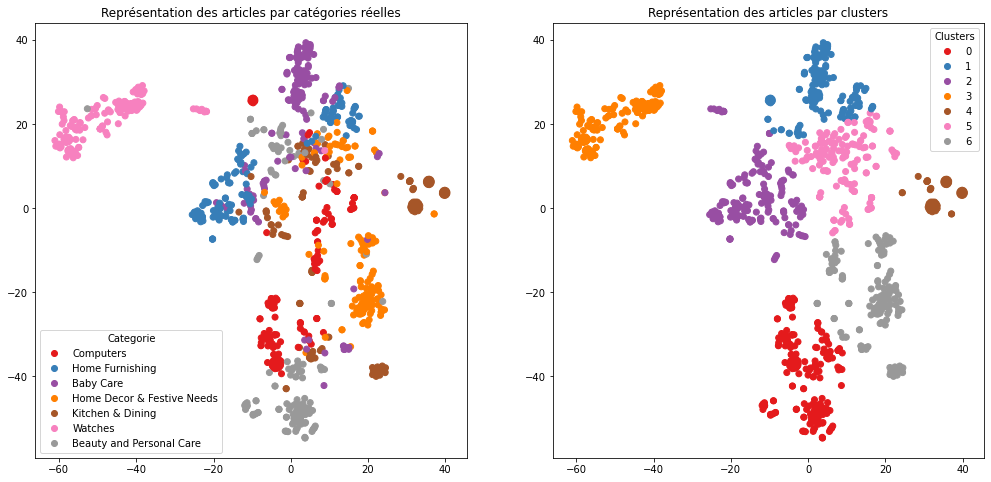

ARI :  0.3673


In [80]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

--> Le ARI est légèrement meilleur qu'avec le Word2Vec (0.37 vs 0.36).

## <a name="C6">Utilisation d'un modèle pré-entrainé pour l'approche Word2Vec.

In [81]:
import gensim.downloader as api

In [82]:
for model_name, model_data in sorted(api.info()['models'].items()):
    print(
        '%s (%d records): %s' % (
            model_name,
            model_data.get('num_records', -1),
            model_data['description'][:40] + '...',
        )
    )

__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors ...
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state...
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipe...
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets,...
glove-twitter-200 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-25 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-50 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-wiki-gigaword-100 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-200 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-300 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-50 (400000 records): Pre-trained vectors based on Wikipedia 2...
word2vec-google-news-300 (3000000 records): Pre-trai

In [83]:
# Nous allons utiliser le modèle 'word2vec-google-news-300'.

In [84]:
import json

In [85]:
print(json.dumps(api.info('word2vec-google-news-300'), indent=4))

{
    "num_records": 3000000,
    "file_size": 1743563840,
    "base_dataset": "Google News (about 100 billion words)",
    "reader_code": "https://github.com/RaRe-Technologies/gensim-data/releases/download/word2vec-google-news-300/__init__.py",
    "license": "not found",
    "parameters": {
        "dimension": 300
    },
    "description": "Pre-trained vectors trained on a part of the Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases. The phrases were obtained using a simple data-driven approach described in 'Distributed Representations of Words and Phrases and their Compositionality' (https://code.google.com/archive/p/word2vec/).",
    "read_more": [
        "https://code.google.com/archive/p/word2vec/",
        "https://arxiv.org/abs/1301.3781",
        "https://arxiv.org/abs/1310.4546",
        "https://www.microsoft.com/en-us/research/publication/linguistic-regularities-in-continuous-space-word-representatio

In [86]:
# On charge le modèle.

pre_trained_w2v_model = api.load('word2vec-google-news-300')

In [87]:
print("Vocabulary size: %i" % len(pre_trained_w2v_model.index_to_key))

Vocabulary size: 3000000


In [88]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in pre_trained_w2v_model.index_to_key:
        j +=1
        embedding_vector = pre_trained_w2v_model[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = pre_trained_w2v_model[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  0.99
Embedding matrix: (3089, 300)


In [89]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_54 (InputLayer)       [(None, 327)]             0         
                                                                 
 embedding_26 (Embedding)    (None, 327, 300)          926700    
                                                                 
 global_average_pooling1d_26  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 926,700
Trainable params: 926,700
Non-trainable params: 0
_________________________________________________________________


In [90]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 8s 122ms/step


(1050, 300)

In [91]:
ARI, X_tsne, labels = ARI_fct(embeddings)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3378 time :  75.0


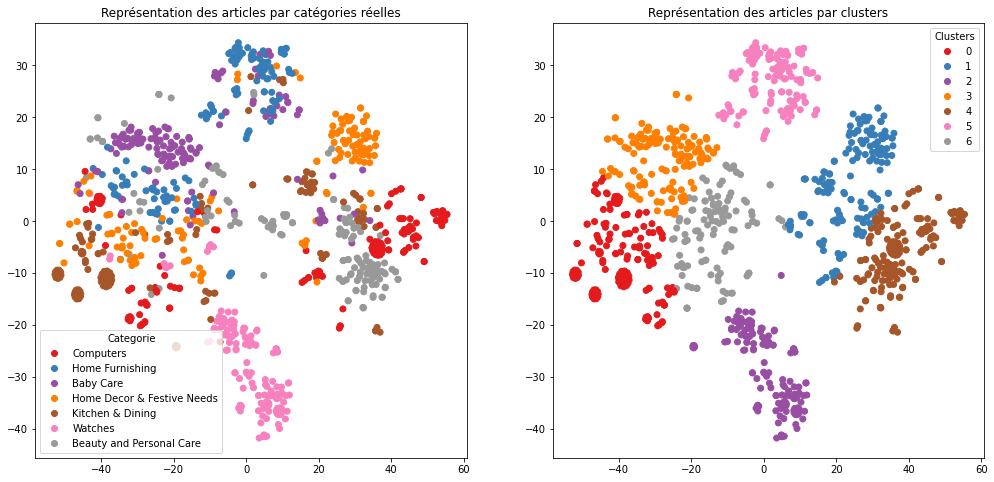

ARI :  0.3378


In [92]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

--> Il n'y a pas d'amélioration du ARI (0.34).

## <a name="C7">Approche de type word embedding : BERT

In [33]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [95]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
2.9.1
Num GPUs Available:  0
True


### Fonctions communes

In [96]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

### 'bert-base-uncased'

In [106]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Fonction pour tokeniser une phrase.
def tokenizer_fct(sentence) :
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Fonction pour mettre en minuscule.
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
                                       and (not w.startswith("http"))]
    return lw

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

df_articles['sentence_dl'] = df_articles['description'].apply(lambda x : transform_dl_fct(x))

In [98]:
# On détermine la longueur maximum d'une description sur l'ensemble des descriptions préprocessées.

maxlen_preprocess_desc = df_articles['sentence_dl'].apply(lambda x: len(nltk.tokenize.word_tokenize(x))).max()

In [99]:
maxlen_preprocess_desc

632

In [100]:
max_length = 512
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df_articles['sentence_dl'].to_list()

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\bmeur/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file https://huggingface.co/bert-base-u

In [101]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\bmeur/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/r

1/1 [==============================] - 9s 9s/step
temps traitement :  1048.0


In [102]:
ARI, X_tsne, labels = ARI_fct(features_bert)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3035 time :  33.0


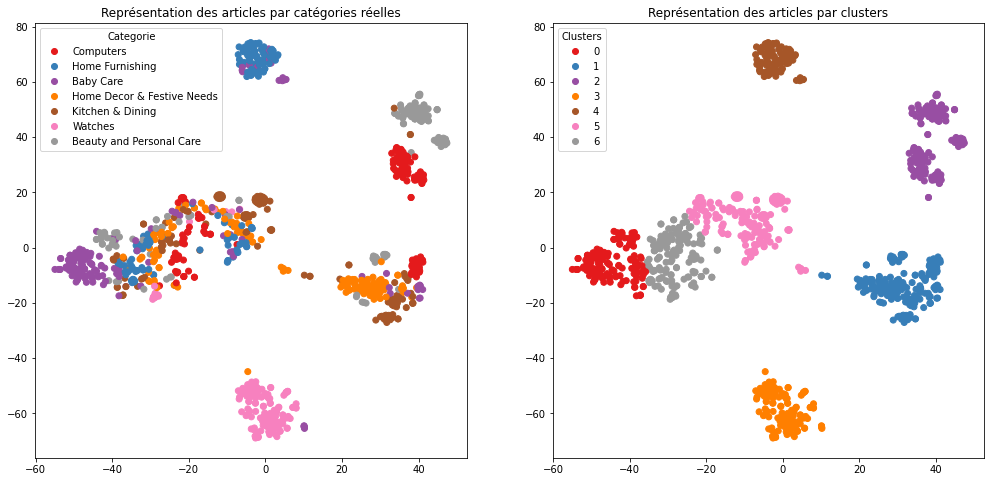

ARI :  0.3035


In [103]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

--> On n'observe pas d'amélioration sur le ARI.

## BERT hub Tensorflow

In [101]:
import tensorflow_hub as hub
import tensorflow_text 

model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [105]:
max_length = 512
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\bmeur/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/r

temps traitement :  1179.0


In [106]:
ARI, X_tsne, labels = ARI_fct(features_bert)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3049 time :  40.0


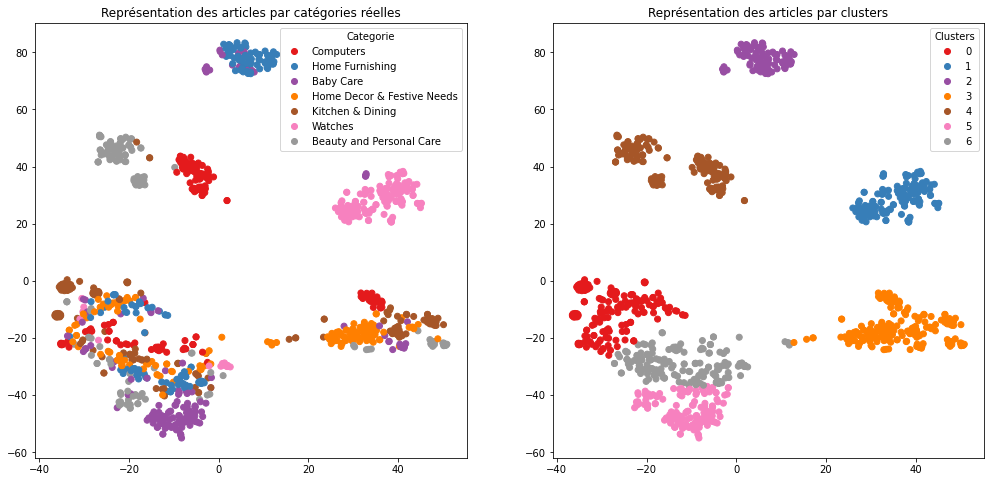

ARI :  0.3049


In [107]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

--> On n'observe pas non plus d'amélioration sur le ARI dans ce cas.

## <a name="C8">Approche de type sentence embedding : USE (Universal Sentence Encoder)

In [103]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [104]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [107]:
batch_size = 10
sentences = df_articles['sentence_dl'].to_list()

In [108]:
features_USE = feature_USE_fct(sentences, batch_size)

In [109]:
ARI, X_tsne, labels = ARI_fct(features_USE)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4318 time :  35.0


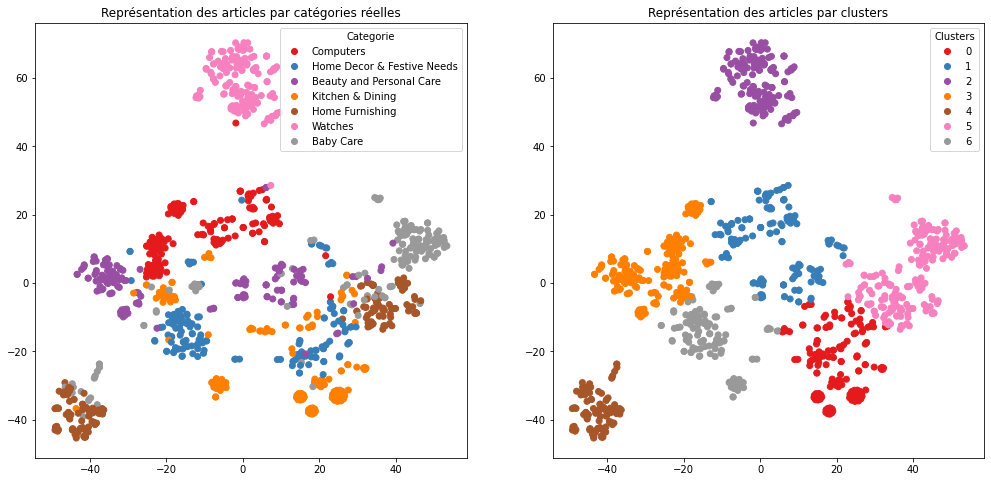

ARI :  0.4318


In [110]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

--> On peut observer une bonne amélioration du ARI qui passe à 0,43 en utilisant l'Universal Sentence Encoder.

In [111]:
# On copie le 'X_tsne' du USE.

X_tsne_USE = X_tsne.copy()

# <a name="C9">3) Extraction des features images

In [115]:
df_articles

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [34]:
from matplotlib.image import imread

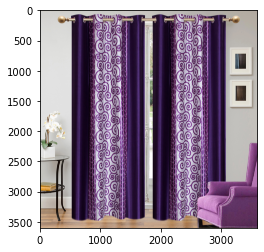

In [117]:
plt.imshow(imread(df_articles['image'][0]))

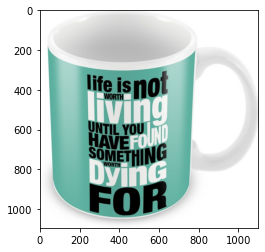

In [118]:
plt.imshow(imread(df_articles['image'][50]))

## <a name="C10">Approche SIFT

In [119]:
import cv2

In [40]:
list_photos = [file for file in df_articles['image']]

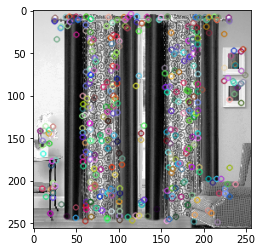

Descripteurs :  (420, 128)

[[ 11.   0.   0. ...   3.   3.   5.]
 [  8. 112.  96. ...   1.   1.   5.]
 [  1.   1.   2. ...   0.   0.   2.]
 ...
 [ 16.   2.   0. ...   0.   0.   0.]
 [  6.   0.   0. ...   1. 135.   1.]
 [ 45.  82.   2. ...   6.   0.   0.]]


In [121]:
# Exemple de détection des key points et des descripteurs de "l'image 0".

sift = cv2.SIFT_create()
image = cv2.imread(list_photos[0],0) # conversion en noir et blanc.
image = cv2.resize(image, (256, 256)) # redimensionnement de l'image en 256 x 256.
image = cv2.equalizeHist(image)   # égalisation de l'histogramme de l'image.
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

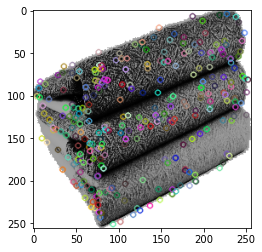

Descripteurs :  (328, 128)

[[  7.   2.   0. ...   0.   0.   0.]
 [  5.  35. 165. ...   0.   0.  10.]
 [  0.   0.   1. ...   0.   0.  61.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [ 53.  15.   0. ...   0.   0.   1.]
 [ 93.  90.   3. ...   0.   0.   0.]]


In [122]:
# Exemple de détection des key points et des descripteurs de "l'image 1".

sift = cv2.SIFT_create()
image = cv2.imread(list_photos[1],0) 
image = cv2.resize(image, (256, 256))
image = cv2.equalizeHist(image) 
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [123]:
# Identifications des key points et des descripteurs associés pour l'ensemble des images.

import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(list_photos[image_num],0)
    image = cv2.resize(image, (256, 256))
    res = cv2.equalizeHist(image)
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (361619, 128)
temps de traitement SIFT descriptor :            39.32 secondes


C:\Users\bmeur\AppData\Local\Temp\ipykernel_15472\1273995467.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)


In [124]:
from sklearn import cluster, metrics

# Determination du nombre de clusters.
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering sur l'ensemble des descripteurs.
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  601
Création de 601 clusters de descripteurs ...


C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


temps de traitement kmeans :            12.77 secondes


In [125]:
# Creation des histogrammes (features).
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation d'une matrice des histogrammes.
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) # construction de l'histogramme.
    hist_vectors.append(hist) # l'histogramme correspond au 'feature vector' de l'image.

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :           265.34 secondes


In [126]:
# On fait une PCA qui garde 99% de la variance sur l'ensemble des features des images.

from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 601)
Dimensions dataset après réduction PCA :  (1050, 485)


In [127]:
# On fait un t-sne à 2 composantes avant de faire le clustering.

from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df_articles["cat"]
print(df_tsne.shape)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1050, 3)


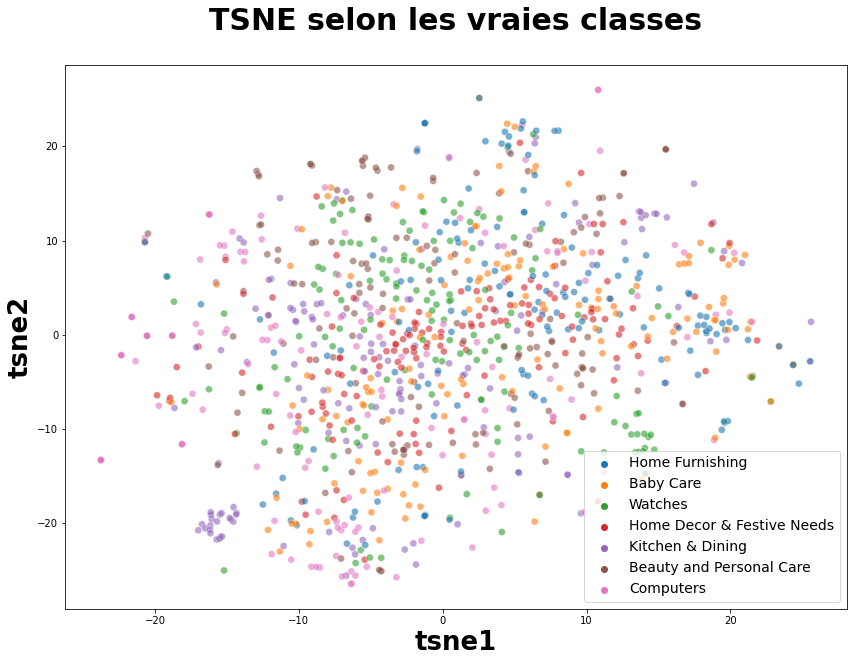

In [128]:
plt.figure(figsize=(14,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

--> On peut remarquer qu'il y a très peu de clusters qui ressortent de manière claire.

In [129]:
# On fait le clustering.

from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


(1050, 4)


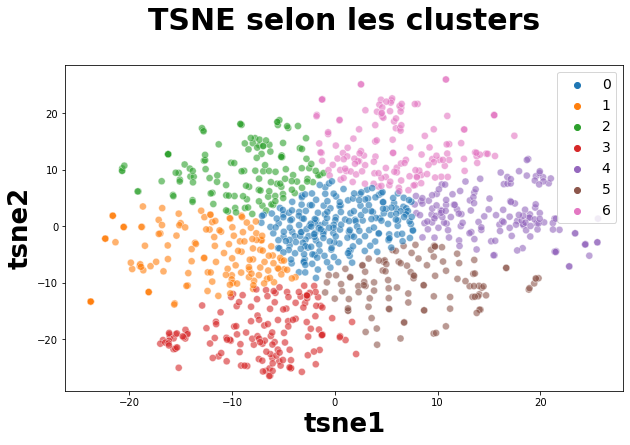

ARI :  0.03629619611167959


In [130]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

print("ARI : ", metrics.adjusted_rand_score(df_articles['cat_num'], cls.labels_))

--> Le ARI de 0,04 confirme que les features detectées grâce à SIFT ne donnent pas un bon clustering.

## <a name="C11">Approche de type CNN Transfer Learning

### <a name="C12">VGG16

In [36]:
from tensorflow.keras.applications.vgg16 import VGG16

In [49]:
# On utilise le modèle VGG16 sans inclure le classifier.

model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [50]:
model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [51]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [52]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model

In [53]:
# On rajoute une couche de Flatten pour obtenir les features sous forme d'un vecteur pour chaque image.

new_model = Model(inputs=model.input, outputs=Flatten()(model.output))

In [54]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [38]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16

In [41]:
# On crée un ensemble 'img_list' comprenant l'ensemble des images redimensionnées et preprocessées.

img_list = []

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
        
    img = load_img(list_photos[image_num], target_size=(224, 224))  # Charger l'image redimensionnée.
    img = img_to_array(img)  # Convertir en tableau numpy
    img_list.append(img)
    
img_list = np.asarray(img_list)
img_list = preprocess_input_vgg16(img_list)

0
100
200
300
400
500
600


C:\Users\bmeur\anaconda3\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


In [42]:
img_list

array([[[[  88.061     ,   87.221     ,   82.32      ],
         [  87.061     ,   86.221     ,   81.32      ],
         [  89.061     ,   85.221     ,   81.32      ],
         ...,
         [  53.060997  ,   49.221     ,   51.32      ],
         [  54.060997  ,   50.221     ,   52.32      ],
         [  53.060997  ,   49.221     ,   51.32      ]],

        [[  99.061     ,   91.221     ,   83.32      ],
         [  97.061     ,   89.221     ,   83.32      ],
         [  98.061     ,   90.221     ,   84.32      ],
         ...,
         [  56.060997  ,   52.221     ,   54.32      ],
         [  54.060997  ,   50.221     ,   52.32      ],
         [  55.060997  ,   51.221     ,   53.32      ]],

        [[  99.061     ,   90.221     ,   84.32      ],
         [ 103.061     ,   92.221     ,   86.32      ],
         [ 103.061     ,   92.221     ,   86.32      ],
         ...,
         [  55.060997  ,   51.221     ,   53.32      ],
         [  56.060997  ,   52.221     ,   54.32      ],
  

In [43]:
img_list.shape

(1050, 224, 224, 3)

In [55]:
# On utilise 'new_model' pour déterminer les features de chacune des images.

features_by_img = new_model.predict(img_list)

33/33 [==============================] - 129s 4s/step


In [56]:
features_by_img.shape

(1050, 25088)

In [57]:
ARI, X_tsne, labels = ARI_fct(features_by_img)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3173 time :  36.0


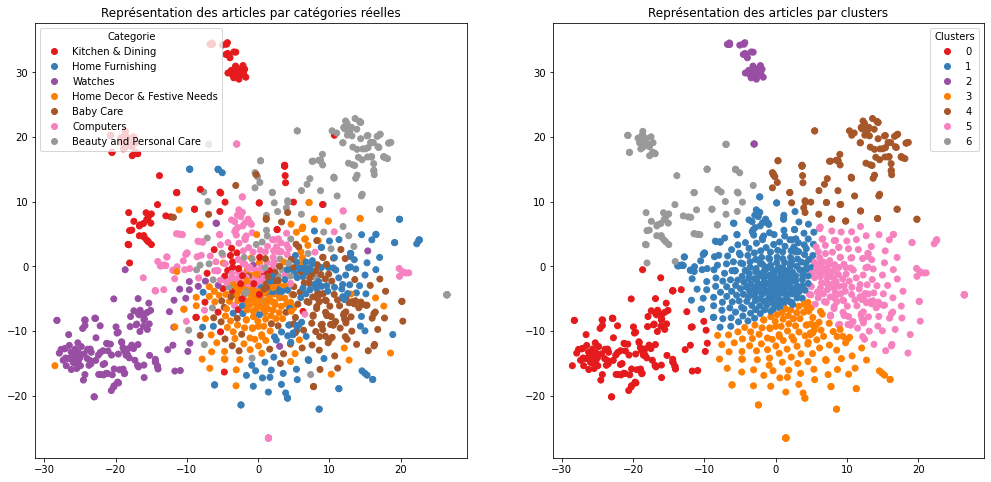

ARI :  0.3173


In [58]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

--> On peut observer que l'on obtient un meilleur ARI qu'avec la méthode SIFT.

In [52]:
# Analysons maintenant l'impact d'entraîner quelques couches de convolution du VGG16 à l'aide du jeu de données.

In [59]:
# Séparons dans un 1er temps le jeu de données en un jeu d'entraînement et un jeu de test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(img_list, df_articles['cat_num'], train_size=0.75, 
                                                    stratify=df_articles['cat_num'], random_state=42)

In [60]:
X_train.shape

(787, 224, 224, 3)

In [61]:
y_train.value_counts()

0    113
5    113
1    113
4    112
3    112
2    112
6    112
Name: cat_num, dtype: int64

In [62]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=7)
y_test_cat = to_categorical(y_test, num_classes=7)

In [63]:
# On analyse le résultat obtenu sur le X_test sans entraînement des couches de convolution.

features_by_img_train_false = new_model.predict(X_test)

9/9 [==============================] - 31s 3s/step


In [64]:
# On ajuste la fonction 'ARI_fct' pour calculer le ARI sur une partie du jeu de données et non l'ensemble du jeu de données.

def ARI_fct_adjusted(features, y_cat_num) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_

In [65]:
ARI, X_tsne, labels = ARI_fct_adjusted(features_by_img_train_false, y_test)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


ARI :  0.2841 time :  25.0


In [66]:
# Maintenant analysons les résultats si on entraîne des couches de convolution.

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# On entraîne uniquement les 8 dernières couches du réseau pour des questions de temps de calcul.
for layer in base_model.layers[:-8]:
    layer.trainable = False

# On rajoute maintenant un classifier aux couches de convolution pour pouvoir entraîner ces dernières.
    
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(7, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [67]:
model.compile(
    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 50)                1254450   
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 7)                 147       
                                                                 
Total params: 15,970,305
Trainable params: 14,234,817
Non-trainable params: 1,735,488
_________________________________________________________________


In [69]:
model.fit(X_train, y_train_cat, epochs=5, batch_size=32)

Epoch 1/5
25/25 [==============================] - 212s 8s/step - loss: 3.4196 - accuracy: 0.3621
Epoch 2/5
25/25 [==============================] - 216s 9s/step - loss: 1.1840 - accuracy: 0.5794
Epoch 3/5
25/25 [==============================] - 214s 9s/step - loss: 0.8324 - accuracy: 0.6938
Epoch 4/5
25/25 [==============================] - 214s 9s/step - loss: 0.5366 - accuracy: 0.8196
Epoch 5/5
25/25 [==============================] - 215s 9s/step - loss: 0.3515 - accuracy: 0.8983


In [70]:
model.evaluate(X_test, y_test_cat)

9/9 [==============================] - 35s 4s/step - loss: 1.1160 - accuracy: 0.6692


[1.1160337924957275, 0.6692014932632446]

In [71]:
# On analyse maintenant les résultats obtenus avec le 'base_model' dont les dernières couches ont été entraînées.

features_by_img_train_true = base_model.predict(X_test)

9/9 [==============================] - 34s 4s/step


In [72]:
# On flatten les résultats pour obtenir un 'feature vector' pour chaque image.

features_by_img_train_true = np.asarray([features_by_img_train_true[i].flatten() 
                                         for i in range(features_by_img_train_true.shape[0])])

In [73]:
ARI, X_tsne, labels = ARI_fct_adjusted(features_by_img_train_true, y_test)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


ARI :  0.2578 time :  24.0


--> On peut remarquer qu'après entraînement de quelques couches de convolution, on n'observe pas d'amélioration sur le ARI pour le jeu de test. Le ARI est de 0,26 vs 0,28 sans entraînement.

### <a name="C13">EfficientNet

In [70]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

In [71]:
# On utilise le modèle EfficientNetB0 sans inclure le classifier.

model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [72]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0

 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

In [73]:
# On rajoute une couche de Flatten pour obtenir les features sous forme d'un vecteur pour chaque image.

new_model = Model(inputs=model.input, outputs=Flatten()(model.output))

In [74]:
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_effNet

In [75]:
# On crée un ensemble 'img_list' comprenant l'ensemble des images redimensionnées et preprocessées.

img_list = []

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
        
    img = load_img(list_photos[image_num], target_size=(224, 224))  # Charger l'image redimensionnée.
    img = img_to_array(img)  # Convertir en tableau numpy
    img_list.append(img)
    
img_list = np.asarray(img_list)
img_list = preprocess_input_effNet(img_list)

0
100
200
300
400
500
600


C:\Users\bmeur\anaconda3\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


In [76]:
img_list.shape

(1050, 224, 224, 3)

In [77]:
# On utilise 'new_model' pour déterminer les features de chacune des images.

features_by_img = new_model.predict(img_list)

33/33 [==============================] - 46s 1s/step


In [78]:
features_by_img.shape

(1050, 62720)

In [79]:
ARI, X_tsne, labels = ARI_fct(features_by_img)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3562 time :  37.0


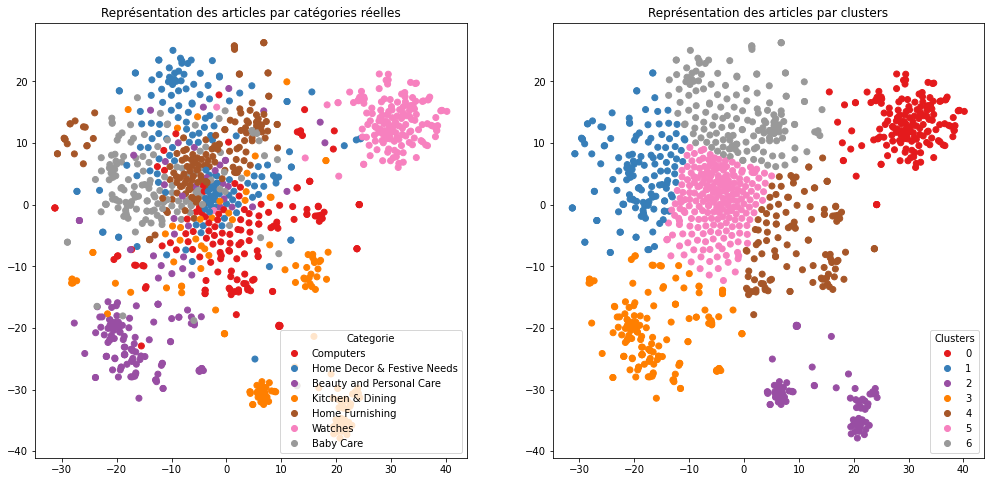

ARI :  0.3562


In [80]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

--> On peut observer une amélioration du ARI par rapport à VGG16 (0.36 vs 0.32).

In [81]:
# On copie le 'X_tsne' et les features 'features_by_img' d'efficientNet.

X_tsne_effNet = X_tsne.copy()
features_effNet = features_by_img.copy()

### <a name="C14">ResNet50

In [93]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [94]:
# On utilise le modèle ResNet50 sans inclure le classifier.

model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [84]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [95]:
# On rajoute une couche de Flatten pour obtenir les features sous forme d'un vecteur pour chaque image.

new_model = Model(inputs=model.input, outputs=Flatten()(model.output))

In [96]:
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resNet

In [97]:
# On crée un ensemble 'img_list' comprenant l'ensemble des images redimensionnées et preprocessées.

img_list = []

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
        
    img = load_img(list_photos[image_num], target_size=(224, 224))  # Charger l'image redimensionnée.
    img = img_to_array(img)  # Convertir en tableau numpy
    img_list.append(img)
    
img_list = np.asarray(img_list)
img_list = preprocess_input_resNet(img_list)

0
100
200
300
400
500
600


C:\Users\bmeur\anaconda3\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


In [98]:
img_list.shape

(1050, 224, 224, 3)

In [99]:
# On utilise 'new_model' pour déterminer les features de chacune des images.

features_by_img = new_model.predict(img_list)

33/33 [==============================] - 76s 2s/step


In [100]:
features_by_img.shape

(1050, 100352)

In [101]:
ARI, X_tsne, labels = ARI_fct(features_by_img)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4266 time :  40.0


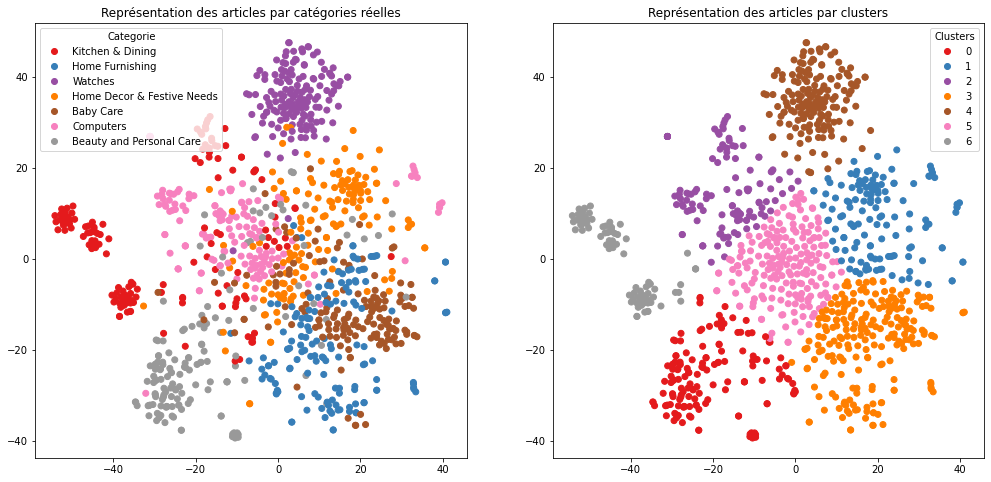

ARI :  0.4266


In [102]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

--> On observe une nouvelle amélioration du ARI avec resNet50 par rapport à VGG16 et EfficientNet (0.43 vs 0.36 et 0.32).

In [93]:
# On copie le 'X_tsne' et les features 'features_by_img' de ResNet50.

X_tsne_resNet = X_tsne.copy()
features_resNet = features_by_img.copy()

In [103]:
# Analysons les images des articles sur certaines des erreurs commises entre les catégories 'Computers' 
# et 'Kitchen & Dining' par exemple.

df_articles['labels_resNet'] = labels

In [106]:
# Articles qui ont été clusturisés en tant que 'Computers' alors que ce sont des 'Kitchen & Dining'.
# 'cat_num' : 6 = Kitchen & Dining ;   'labels_resNet' : 2 = Computers

df_errors_comp_vs_kitchen = df_articles[(df_articles['cat_num'] == 6) & (df_articles['labels_resNet'] == 2)]

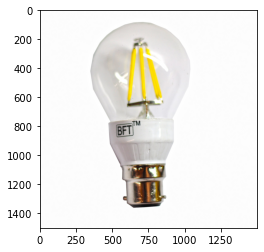

In [141]:
# Quelques exemples.

plt.imshow(imread(df_errors_comp_vs_kitchen['image'].iloc[0]))

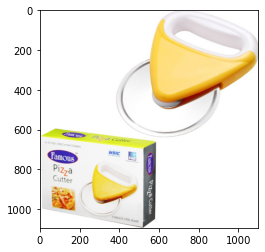

In [142]:
plt.imshow(imread(df_errors_comp_vs_kitchen['image'].iloc[1]))

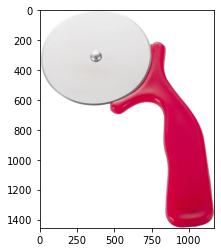

In [143]:
plt.imshow(imread(df_errors_comp_vs_kitchen['image'].iloc[2]))

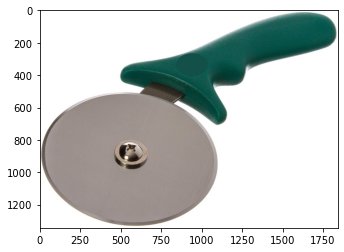

In [144]:
plt.imshow(imread(df_errors_comp_vs_kitchen['image'].iloc[3]))

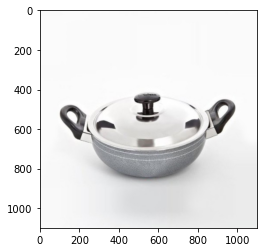

In [155]:
plt.imshow(imread(df_errors_comp_vs_kitchen['image'].iloc[-15]))

In [121]:
# Articles qui ont été clusturisés en tant que 'Computers' et qui sont bien des 'Computers'.
# 'cat_num' : 5 = Computers ;   'labels_resNet' : 2 = Computers

df_comp = df_articles[(df_articles['cat_num'] == 5) & (df_articles['labels_resNet'] == 2)]

In [122]:
df_comp['image']

53     6329ddb46087cb8c09ced95471dd9643.jpg
54     7e6ae1b372e8e0b509b83ba3658b8107.jpg
55     e2ae2af58ac50adf4881751ae84a9d8a.jpg
312    c20bf28cd809790c04e78fdaf47c038f.jpg
318    fd2716d0e5dd7ffc367ca4dd9f97aaa0.jpg
                       ...                 
848    41dccf212ff447cd7213a2b1e669e406.jpg
852    70af4c3c05688d8400632e134f258b98.jpg
855    7cdc62f8d3f7ab8b9d2dddc14c86de83.jpg
857    a41371b2f8859b015031f0d5eda5184c.jpg
864    19d2dbc1789653c58bce08c169662cf2.jpg
Name: image, Length: 68, dtype: object

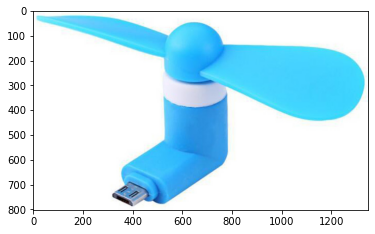

In [156]:
# Quelques exemples.

plt.imshow(imread(df_comp['image'].iloc[0]))

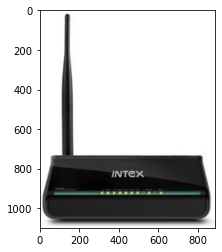

In [159]:
plt.imshow(imread(df_comp['image'].iloc[3]))

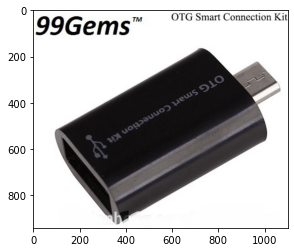

In [201]:
plt.imshow(imread(df_comp['image'].iloc[-2]))

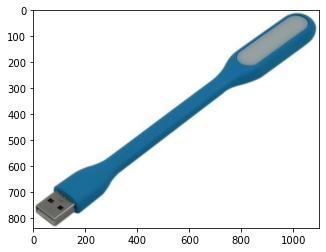

In [199]:
plt.imshow(imread(df_comp['image'].iloc[-4]))

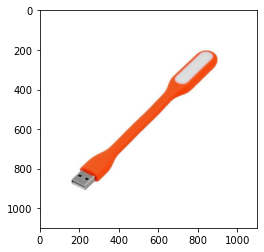

In [200]:
plt.imshow(imread(df_comp['image'].iloc[-3]))

--> On peut remarquer que les images de 'Kitchen & Dining' qui sont confondus avec la catégorie 'Computers' possèdent une partie grisée métallique que l'on peut retrouver dans certains objets de la catégorie 'Computers' et qui a sans doute été déterminée comme une feature de la catégorie 'Computers'.

## <a name="C15">4) Association des features texte et images

In [94]:
# Nous allons maintenant associer les features texte et images avec lesquelles nous avons obtenu les meilleurs scores ARI.
# Pour le texte nous allons utiliser tf-idf et USE.
# Pour les images, nous allons utiliser EfficientNet et ResNet50.

In [112]:
# Associons dans un premier temps les X_tsne obtenus avec tf-idf et efficientNet.

X_tsne_tf_idf

array([[ 21.313353 ,  -5.291387 ],
       [ 41.553562 ,  -0.6044596],
       [ 38.69747  ,  -1.6306529],
       ...,
       [  1.4968574, -32.85061  ],
       [  3.491099 , -32.128036 ],
       [  2.0532315, -32.09516  ]], dtype=float32)

In [113]:
X_tsne_effNet

array([[-26.070305 ,  12.618927 ],
       [ -4.7238064,   5.920335 ],
       [ -6.139166 ,   4.6401715],
       ...,
       [  6.9221616,   7.926593 ],
       [-17.41949  ,  10.132242 ],
       [-14.9584465,  11.362399 ]], dtype=float32)

In [114]:
X_tsne_tf_idf_effNet = np.column_stack([X_tsne_tf_idf, X_tsne_effNet])

In [115]:
# Faisons maintenant un k-means sur cette association.

cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(X_tsne_tf_idf_effNet)
print("ARI : ", metrics.adjusted_rand_score(df_articles['cat_num'], cls.labels_))

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.5323626434812581


--> Pour rappel, nous avions obtenu 0,53 de ARI avec tf-idf sur le texte et 0,36 avec efficientNet sur les images. Donc on peut voir que le ARI reste identique au tf-idf avec cette combinaison du texte et des images.

In [116]:
# Faisons de même maintenant avec les X_tsne obtenus avec USE et efficientNet.

X_tsne_USE

array([[ 37.273262  , -12.497165  ],
       [ 38.668045  ,  -1.0018862 ],
       [ 39.087585  ,  -0.90935427],
       ...,
       [-12.341979  ,  -2.275682  ],
       [-11.693761  ,  -0.42249852],
       [-12.032411  ,  -1.3822334 ]], dtype=float32)

In [117]:
X_tsne_effNet

array([[-26.070305 ,  12.618927 ],
       [ -4.7238064,   5.920335 ],
       [ -6.139166 ,   4.6401715],
       ...,
       [  6.9221616,   7.926593 ],
       [-17.41949  ,  10.132242 ],
       [-14.9584465,  11.362399 ]], dtype=float32)

In [118]:
X_tsne_USE_effNet = np.column_stack([X_tsne_USE, X_tsne_effNet])

In [119]:
# Faisons maintenant un k-means sur cette association.

cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(X_tsne_USE_effNet)
print("ARI : ", metrics.adjusted_rand_score(df_articles['cat_num'], cls.labels_))

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4634316725780538


--> Pour rappel, nous avions obtenu 0,43 de ARI avec USE sur le texte et 0,36 avec efficientNet sur les images. Donc on peut voir une légère amélioration en passant à 0,46 avec cette combinaison du texte et des images.

In [120]:
# Essayons maintenant de combiner directement les features obtenus pour chacune des approches en faisant ensuite
# un t-sne sur la combinaison obtenu.

# Commençons par la combinaison tf-idf avec efficientNet.

features_tf_idf

<1050x1584 sparse matrix of type '<class 'numpy.float64'>'
	with 21528 stored elements in Compressed Sparse Row format>

In [121]:
type(features_tf_idf)

scipy.sparse.csr.csr_matrix

In [122]:
features_effNet

array([[ 1.7986531 , -0.21391416, -0.2335221 , ...,  0.59965825,
         0.24248534, -0.23206626],
       [-0.23729292, -0.20294167, -0.26675004, ..., -0.17014769,
        -0.19070901, -0.2784276 ],
       [-0.2686681 , -0.18988584, -0.26847962, ..., -0.2530252 ,
         2.3128996 , -0.27596036],
       ...,
       [-0.2723694 , -0.10727273,  0.64271986, ..., -0.27794573,
        -0.27846083, -0.11677256],
       [-0.20321025, -0.17527795, -0.24708813, ..., -0.0880812 ,
        -0.07219153, -0.25847843],
       [ 0.2800287 , -0.27449292, -0.23724154, ..., -0.14130625,
        -0.26782808, -0.27808896]], dtype=float32)

In [123]:
features_tf_idf_effNet = np.column_stack([features_tf_idf.toarray(), features_effNet])

In [124]:
# On fait un t-sne sur la combinaison obtenu. Puis on applique le k-means.

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(features_tf_idf_effNet)

cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(X_tsne)
print("ARI : ", metrics.adjusted_rand_score(df_articles['cat_num'], cls.labels_))

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.36012525137725404


--> On peut remarquer que l'on améliore pas le ARI avec cette méthode.

In [125]:
# Essayons la même chose avec la combinaison USE et efficientNet.

features_USE

array([[-0.05539608, -0.02782313,  0.01833179, ...,  0.05086442,
         0.04917975, -0.01530948],
       [-0.0512289 , -0.01898725,  0.01227693, ...,  0.0330819 ,
         0.03153948,  0.03463586],
       [-0.05810827,  0.02152601, -0.04410999, ...,  0.05775318,
        -0.05077326, -0.04726291],
       ...,
       [-0.04408048, -0.03755883,  0.03047278, ...,  0.01414982,
         0.05765437, -0.06278041],
       [-0.04686179, -0.0392844 ,  0.04898711, ...,  0.04509434,
        -0.01900146, -0.02946297],
       [-0.05539847, -0.02439286,  0.05092699, ...,  0.04759796,
        -0.02505928, -0.01377851]], dtype=float32)

In [126]:
features_effNet

array([[ 1.7986531 , -0.21391416, -0.2335221 , ...,  0.59965825,
         0.24248534, -0.23206626],
       [-0.23729292, -0.20294167, -0.26675004, ..., -0.17014769,
        -0.19070901, -0.2784276 ],
       [-0.2686681 , -0.18988584, -0.26847962, ..., -0.2530252 ,
         2.3128996 , -0.27596036],
       ...,
       [-0.2723694 , -0.10727273,  0.64271986, ..., -0.27794573,
        -0.27846083, -0.11677256],
       [-0.20321025, -0.17527795, -0.24708813, ..., -0.0880812 ,
        -0.07219153, -0.25847843],
       [ 0.2800287 , -0.27449292, -0.23724154, ..., -0.14130625,
        -0.26782808, -0.27808896]], dtype=float32)

In [127]:
features_USE_effNet = np.column_stack([features_USE, features_effNet])

In [128]:
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(features_USE_effNet)

cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(X_tsne)
print("ARI : ", metrics.adjusted_rand_score(df_articles['cat_num'], cls.labels_))

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.3537713284761048


--> On peut remarquer que l'on n'améliore pas non plus le ARI avec cette combinaison et cette méthode.

In [129]:
# Associons maintenant les X_tsne obtenus avec tf-idf et ResNet50.

X_tsne_tf_idf

array([[ 21.313353 ,  -5.291387 ],
       [ 41.553562 ,  -0.6044596],
       [ 38.69747  ,  -1.6306529],
       ...,
       [  1.4968574, -32.85061  ],
       [  3.491099 , -32.128036 ],
       [  2.0532315, -32.09516  ]], dtype=float32)

In [130]:
X_tsne_resNet

array([[ -3.2103615, -25.47726  ],
       [ 12.558081 ,  -5.028802 ],
       [ 14.410923 , -11.215046 ],
       ...,
       [  0.4543618,  -3.313126 ],
       [ 14.905815 ,   3.6276796],
       [-10.558187 , -16.21244  ]], dtype=float32)

In [131]:
X_tsne_tf_idf_resNet = np.column_stack([X_tsne_tf_idf, X_tsne_resNet])

In [132]:
# Faisons maintenant un k-means sur cette association.

cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(X_tsne_tf_idf_resNet)
print("ARI : ", metrics.adjusted_rand_score(df_articles['cat_num'], cls.labels_))

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.546211862980206


--> Pour rappel, nous avions obtenu 0,53 de ARI avec tf-idf sur le texte et 0,43 avec ResNet50 sur les images. Donc on peut voir une légère amélioration en passant à 0,55 avec cette combinaison du texte et des images.

In [133]:
# Faisons de même maintenant avec les X_tsne obtenus avec USE et resNet50.

X_tsne_USE

array([[ 37.273262  , -12.497165  ],
       [ 38.668045  ,  -1.0018862 ],
       [ 39.087585  ,  -0.90935427],
       ...,
       [-12.341979  ,  -2.275682  ],
       [-11.693761  ,  -0.42249852],
       [-12.032411  ,  -1.3822334 ]], dtype=float32)

In [134]:
X_tsne_resNet

array([[ -3.2103615, -25.47726  ],
       [ 12.558081 ,  -5.028802 ],
       [ 14.410923 , -11.215046 ],
       ...,
       [  0.4543618,  -3.313126 ],
       [ 14.905815 ,   3.6276796],
       [-10.558187 , -16.21244  ]], dtype=float32)

In [135]:
X_tsne_USE_resNet = np.column_stack([X_tsne_USE, X_tsne_resNet])

In [136]:
# Faisons maintenant un k-means sur cette association.

cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(X_tsne_USE_resNet)
print("ARI : ", metrics.adjusted_rand_score(df_articles['cat_num'], cls.labels_))

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.533694743718629


--> Pour rappel, nous avions obtenu 0,43 de ARI avec USE sur le texte et 0,43 avec ResNet50 sur les images. Donc on peut voir une bonne amélioration en passant à 0,53 avec cette combinaison du texte et des images.

In [137]:
# Essayons maintenant de combiner directement les features obtenus pour chacune des approches en faisant ensuite
# un t-sne sur la combinaison obtenu.

# Commençons par la combinaison tf-idf avec ResNet50.

features_tf_idf

<1050x1584 sparse matrix of type '<class 'numpy.float64'>'
	with 21528 stored elements in Compressed Sparse Row format>

In [138]:
type(features_tf_idf)

scipy.sparse.csr.csr_matrix

In [139]:
features_resNet

array([[3.1620102 , 0.09873867, 0.        , ..., 0.        , 0.        ,
        0.47900903],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.68672717, 0.        , 0.        , ..., 0.5221938 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.801283  , 0.        ,
        0.        ]], dtype=float32)

In [140]:
features_tf_idf_resNet = np.column_stack([features_tf_idf.toarray(), features_resNet])

In [141]:
# On fait un t-sne sur la combinaison obtenu. Puis on applique le k-means.

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(features_tf_idf_resNet)

cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(X_tsne)
print("ARI : ", metrics.adjusted_rand_score(df_articles['cat_num'], cls.labels_))

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.418247555994512


--> On peut remarquer que l'on améliore pas le ARI avec cette méthode.

In [142]:
# Essayons la même chose avec la combinaison USE et ResNet50.

features_USE

array([[-0.05539608, -0.02782313,  0.01833179, ...,  0.05086442,
         0.04917975, -0.01530948],
       [-0.0512289 , -0.01898725,  0.01227693, ...,  0.0330819 ,
         0.03153948,  0.03463586],
       [-0.05810827,  0.02152601, -0.04410999, ...,  0.05775318,
        -0.05077326, -0.04726291],
       ...,
       [-0.04408048, -0.03755883,  0.03047278, ...,  0.01414982,
         0.05765437, -0.06278041],
       [-0.04686179, -0.0392844 ,  0.04898711, ...,  0.04509434,
        -0.01900146, -0.02946297],
       [-0.05539847, -0.02439286,  0.05092699, ...,  0.04759796,
        -0.02505928, -0.01377851]], dtype=float32)

In [143]:
features_resNet

array([[3.1620102 , 0.09873867, 0.        , ..., 0.        , 0.        ,
        0.47900903],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.68672717, 0.        , 0.        , ..., 0.5221938 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.801283  , 0.        ,
        0.        ]], dtype=float32)

In [144]:
features_USE_resNet = np.column_stack([features_USE, features_resNet])

In [145]:
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(features_USE_resNet)

cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(X_tsne)
print("ARI : ", metrics.adjusted_rand_score(df_articles['cat_num'], cls.labels_))

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI :  0.4208365934721225


--> On peut remarquer que l'on n'améliore pas non plus le ARI avec cette combinaison et cette méthode.

## <a name="C16">5) Bonus : résultats en utilisant un classifier sur les images

In [146]:
# En bonus, ajoutons un classifier aux modèles EfficientNet et Resnet50 pour voir les résultats après entraînement du modèle.

In [147]:
# Reconstruisons 'img_list' pour avoir un preprocess_input adéquate avec EfficientNet.

img_list = []

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
        
    img = load_img(list_photos[image_num], target_size=(224, 224))
    img = img_to_array(img)
    img_list.append(img)
    
img_list = np.asarray(img_list)
img_list = preprocess_input_effNet(img_list)

0
100
200
300
400
500
600


C:\Users\bmeur\anaconda3\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


In [148]:
# Séparons maintenant 'img_list' en un jeu d'entraînement et un jeu de test.

X_train, X_test, y_train, y_test = train_test_split(img_list, df_articles['cat_num'], train_size=0.75, 
                                                    stratify=df_articles['cat_num'], random_state=42)

y_train_cat = to_categorical(y_train, num_classes=7)
y_test_cat = to_categorical(y_test, num_classes=7)

In [149]:
y_train.value_counts()

0    113
5    113
1    113
4    112
3    112
2    112
6    112
Name: cat_num, dtype: int64

In [150]:
model_effNet = EfficientNetB0(weights="imagenet", include_top=True, input_shape=(224, 224, 3))

In [151]:
model_effNet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

                                                                                                  
 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_b

 block4b_dwconv (DepthwiseConv2  (None, 14, 14, 480)  4320       ['block4b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePoolin

                                                                                                  
 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
          

                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
          

                                                                                                  
 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation) 

In [152]:
for layer in model_effNet.layers[:-2]:
    layer.trainable = False

In [154]:
from tensorflow.keras import layers, models

In [155]:
# Dans un 1er temps, ajoutons simplement une couche de 7 neurones à la couche fully connected de l'efficientNet.

prediction_layer = layers.Dense(7, activation='softmax')

model = models.Sequential([
    model_effNet,
    prediction_layer
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [156]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1000)             5330571   
                                                                 
 dense_4 (Dense)             (None, 7)                 7007      
                                                                 
Total params: 5,337,578
Trainable params: 1,288,007
Non-trainable params: 4,049,571
_________________________________________________________________


In [157]:
model.fit(X_train, y_train_cat, epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 55s 2s/step - loss: 1.9227 - accuracy: 0.4320
Epoch 2/10
25/25 [==============================] - 36s 1s/step - loss: 1.8813 - accuracy: 0.7980
Epoch 3/10
25/25 [==============================] - 35s 1s/step - loss: 1.8420 - accuracy: 0.8653
Epoch 4/10
25/25 [==============================] - 34s 1s/step - loss: 1.8013 - accuracy: 0.8856
Epoch 5/10
25/25 [==============================] - 34s 1s/step - loss: 1.7595 - accuracy: 0.9047
Epoch 6/10
25/25 [==============================] - 34s 1s/step - loss: 1.7178 - accuracy: 0.9072
Epoch 7/10
25/25 [==============================] - 34s 1s/step - loss: 1.6759 - accuracy: 0.9238
Epoch 8/10
25/25 [==============================] - 34s 1s/step - loss: 1.6376 - accuracy: 0.9365
Epoch 9/10
25/25 [==============================] - 34s 1s/step - loss: 1.5991 - accuracy: 0.9403
Epoch 10/10
25/25 [==============================] - 35s 1s/step - loss: 1.5594 - accuracy: 0.9466


In [158]:
model.evaluate(X_test, y_test_cat)

9/9 [==============================] - 13s 1s/step - loss: 1.5735 - accuracy: 0.8593


[1.5734500885009766, 0.8593155741691589]

--> On obtient une accuracy de 86% sur le jeu de test.

In [159]:
# Essayons maintenant de ne pas inclure les couches fully connected de l'efficientNet et ajoutons plusieurs autres
# couches manuellement.

model_effNet = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [160]:
model_effNet.trainable = False # on n'autorise pas l'entraînement des couches de convolution.

In [161]:
model_effNet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_6[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

                                                                                                  
 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_b

 block4b_dwconv (DepthwiseConv2  (None, 14, 14, 480)  4320       ['block4b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePoolin

                                                                                                  
 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
          

                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
          

                                                                                                  
 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation) 

In [162]:
# On essaie maintenant comme classifier, 3 couches de neurones dont une de 50 puis une de 20 et enfin une de 7.

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(7, activation='softmax')


model = models.Sequential([
    model_effNet,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [163]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [164]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_5 (Dense)             (None, 50)                3136050   
                                                                 
 dense_6 (Dense)             (None, 20)                1020      
                                                                 
 dense_7 (Dense)             (None, 7)                 147       
                                                                 
Total params: 7,186,788
Trainable params: 3,137,217
Non-trainable params: 4,049,571
_________________________________________________________________


In [165]:
model.fit(X_train, y_train_cat, epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 128s 1s/step - loss: 1.1334 - accuracy: 0.7141
Epoch 2/10
25/25 [==============================] - 34s 1s/step - loss: 0.2677 - accuracy: 0.9276
Epoch 3/10
25/25 [==============================] - 34s 1s/step - loss: 0.0925 - accuracy: 0.9809
Epoch 4/10
25/25 [==============================] - 34s 1s/step - loss: 0.0273 - accuracy: 0.9911
Epoch 5/10
25/25 [==============================] - 34s 1s/step - loss: 0.0098 - accuracy: 0.9975
Epoch 6/10
25/25 [==============================] - 34s 1s/step - loss: 0.0043 - accuracy: 0.9975
Epoch 7/10
25/25 [==============================] - 34s 1s/step - loss: 0.0019 - accuracy: 1.0000
Epoch 8/10
25/25 [==============================] - 34s 1s/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/10
25/25 [==============================] - 34s 1s/step - loss: 6.0129e-04 - accuracy: 1.0000
Epoch 10/10
25/25 [==============================] - 34s 1s/step - loss: 0.0010 - accuracy: 1.0000


In [166]:
model.evaluate(X_test, y_test_cat)

9/9 [==============================] - 12s 1s/step - loss: 0.8769 - accuracy: 0.8327


[0.8768633008003235, 0.8326995968818665]

--> On obtient une accuracy de 83% sur le jeu de test.

In [167]:
# Ajoutons maintenant un classifier au modèle ResNet50 pour voir les résultats après entraînement du modèle.

# Reconstruisons 'img_list' pour avoir un preprocess_input adéquate avec ResNet50.

img_list = []

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
        
    img = load_img(list_photos[image_num], target_size=(224, 224))
    img = img_to_array(img)
    img_list.append(img)
    
img_list = np.asarray(img_list)
img_list = preprocess_input_resNet(img_list)

0
100
200
300
400
500
600


C:\Users\bmeur\anaconda3\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


In [168]:
# Séparons maintenant 'img_list' en un jeu d'entraînement et un jeu de test.

X_train, X_test, y_train, y_test = train_test_split(img_list, df_articles['cat_num'], train_size=0.75, 
                                                    stratify=df_articles['cat_num'], random_state=42)

y_train_cat = to_categorical(y_train, num_classes=7)
y_test_cat = to_categorical(y_test, num_classes=7)

In [169]:
y_train.value_counts()

0    113
5    113
1    113
4    112
3    112
2    112
6    112
Name: cat_num, dtype: int64

In [170]:
model_resNet = ResNet50(weights="imagenet", include_top=True, input_shape=(224, 224, 3))

In [171]:
model_resNet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [172]:
for layer in model_resNet.layers[:-1]:
    layer.trainable = False

In [173]:
# Dans un 1er temps, ajoutons simplement une couche de 7 neurones à la couche fully connected du ResNet50.

prediction_layer = layers.Dense(7, activation='softmax')

model = models.Sequential([
    model_resNet,
    prediction_layer
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [174]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_8 (Dense)             (None, 7)                 7007      
                                                                 
Total params: 25,643,719
Trainable params: 2,056,007
Non-trainable params: 23,587,712
_________________________________________________________________


In [175]:
model.fit(X_train, y_train_cat, epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 57s 2s/step - loss: 1.9066 - accuracy: 0.5413
Epoch 2/10
25/25 [==============================] - 54s 2s/step - loss: 1.8645 - accuracy: 0.7916
Epoch 3/10
25/25 [==============================] - 54s 2s/step - loss: 1.8255 - accuracy: 0.8577
Epoch 4/10
25/25 [==============================] - 54s 2s/step - loss: 1.7866 - accuracy: 0.8793
Epoch 5/10
25/25 [==============================] - 55s 2s/step - loss: 1.7458 - accuracy: 0.9034
Epoch 6/10
25/25 [==============================] - 55s 2s/step - loss: 1.7066 - accuracy: 0.9339
Epoch 7/10
25/25 [==============================] - 55s 2s/step - loss: 1.6650 - accuracy: 0.9530
Epoch 8/10
25/25 [==============================] - 54s 2s/step - loss: 1.6259 - accuracy: 0.9593
Epoch 9/10
25/25 [==============================] - 54s 2s/step - loss: 1.5889 - accuracy: 0.9606
Epoch 10/10
25/25 [==============================] - 54s 2s/step - loss: 1.5538 - accuracy: 0.9619


In [176]:
model.evaluate(X_test, y_test_cat)

9/9 [==============================] - 19s 2s/step - loss: 1.5898 - accuracy: 0.8403


[1.5898255109786987, 0.8403041958808899]

--> On obtient une accuracy de 84% sur le jeu de test.

In [177]:
# Essayons maintenant de ne pas inclure les couches fully connected du ResNet50 et ajoutons plusieurs autres
# couches manuellement.

model_resNet = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [178]:
model_resNet.trainable = False # on n'autorise pas l'entraînement des couches de convolution.

In [179]:
model_resNet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [180]:
# On essaie maintenant comme classifier, 3 couches de neurones dont une de 50 puis une de 20 et enfin une de 7.

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(7, activation='softmax')


model = models.Sequential([
    model_resNet,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [181]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [182]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_9 (Dense)             (None, 50)                5017650   
                                                                 
 dense_10 (Dense)            (None, 20)                1020      
                                                                 
 dense_11 (Dense)            (None, 7)                 147       
                                                                 
Total params: 28,606,529
Trainable params: 5,018,817
Non-trainable params: 23,587,712
_________________________________________________________________


In [183]:
model.fit(X_train, y_train_cat, epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 57s 2s/step - loss: 2.9737 - accuracy: 0.5654
Epoch 2/10
25/25 [==============================] - 54s 2s/step - loss: 0.6254 - accuracy: 0.8666
Epoch 3/10
25/25 [==============================] - 55s 2s/step - loss: 0.2460 - accuracy: 0.9657
Epoch 4/10
25/25 [==============================] - 54s 2s/step - loss: 0.0554 - accuracy: 0.9797
Epoch 5/10
25/25 [==============================] - 55s 2s/step - loss: 0.0506 - accuracy: 0.9848
Epoch 6/10
25/25 [==============================] - 55s 2s/step - loss: 0.0307 - accuracy: 0.9898
Epoch 7/10
25/25 [==============================] - 54s 2s/step - loss: 0.0101 - accuracy: 0.9949
Epoch 8/10
25/25 [==============================] - 55s 2s/step - loss: 0.0064 - accuracy: 0.9962
Epoch 9/10
25/25 [==============================] - 54s 2s/step - loss: 0.0112 - accuracy: 0.9975
Epoch 10/10
25/25 [==============================] - 55s 2s/step - loss: 0.0095 - accuracy: 0.9987


In [184]:
model.evaluate(X_test, y_test_cat)

9/9 [==============================] - 19s 2s/step - loss: 1.7829 - accuracy: 0.8099


[1.7828696966171265, 0.8098859190940857]

--> On obtient une accuracy de 81% sur le jeu de test.